In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
import pickle

### Problem Statement

In [2]:
# 1.battery_power -
# 2.blue          -
# 3.clock_speed   -
# 4.dual_sim      -
# 5.fc            -
# 6.four_g        -
# 7.int_memory    -
# 8.m_dep         -
# 9.mobile_wt     -
# 10.n_cores      -
# 11.pc           -
# 12.px_height    -
# 13.touch_screen -
# 14.wifi         - 
# 15.price_range  -

In [3]:
# To predict the Mobile Price Range by using mobile Phone related data.

# price Range     Price
#  (Grade)
#    High        30-35k
#    Medium      25-30k
#    Moderate    18-24k 
#    Low         10-16k 
    

### Data_Gathering

In [4]:
df = pd.read_csv("Mobile_Phone.csv")
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


### EDA

In [5]:
df["price_range"].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64

In [6]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [8]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


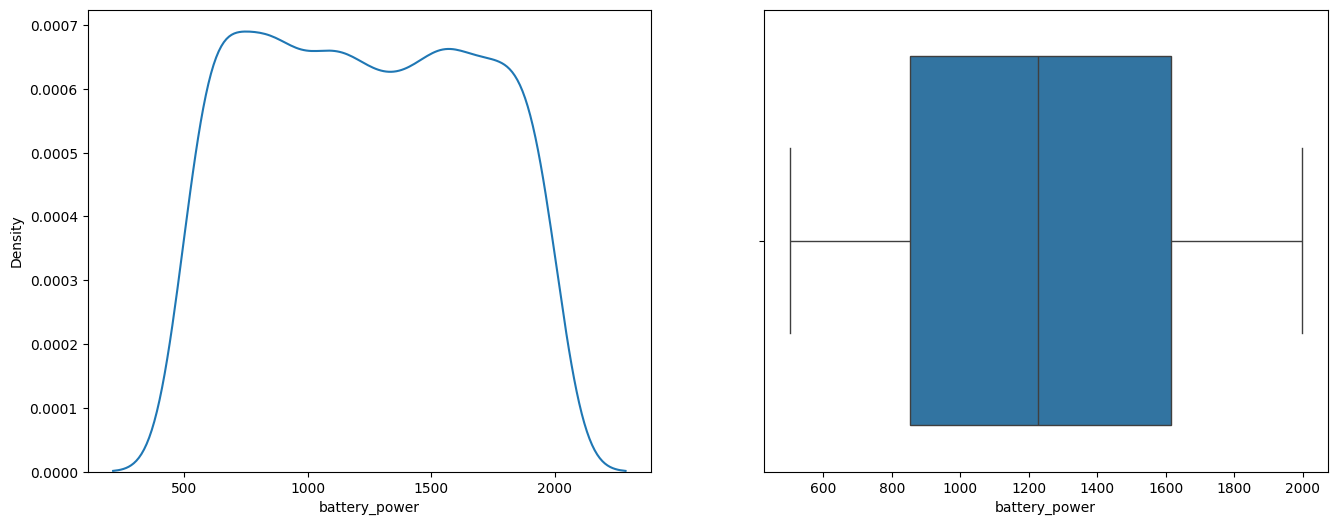

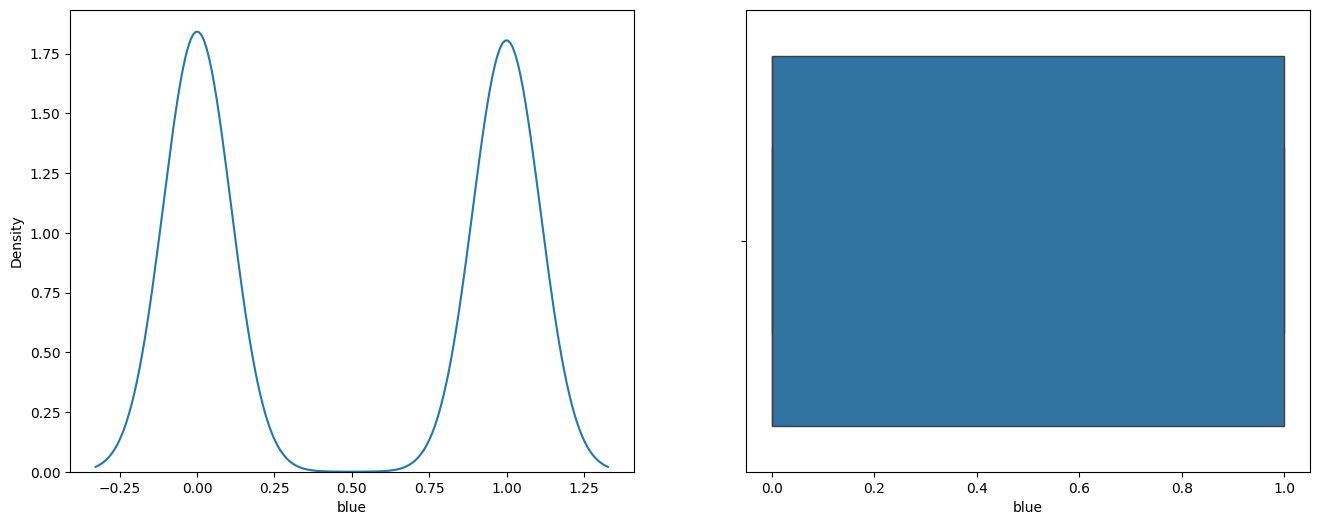

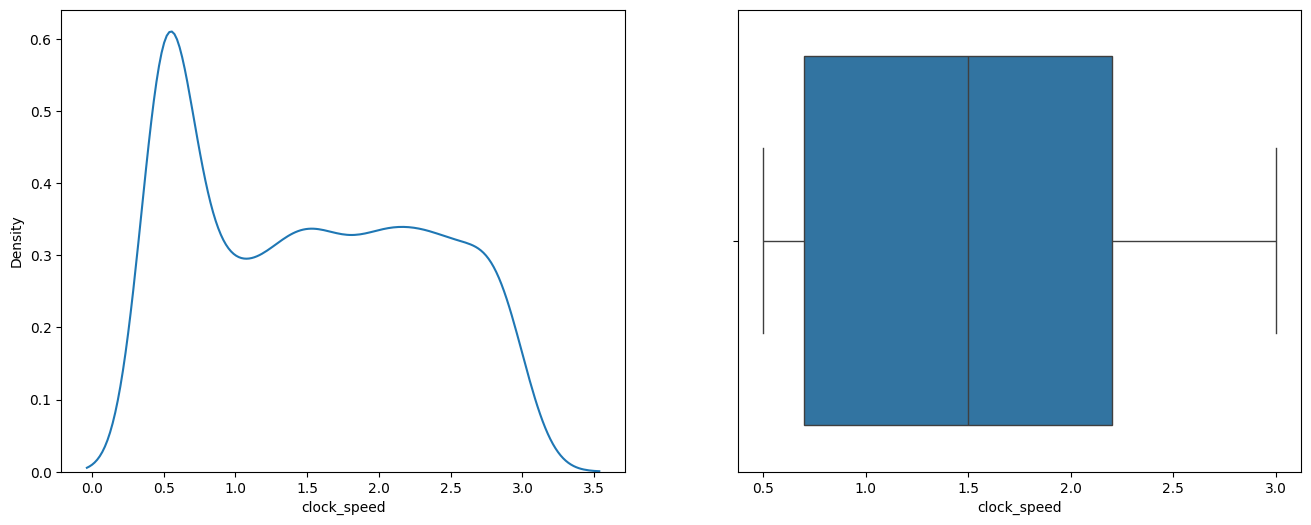

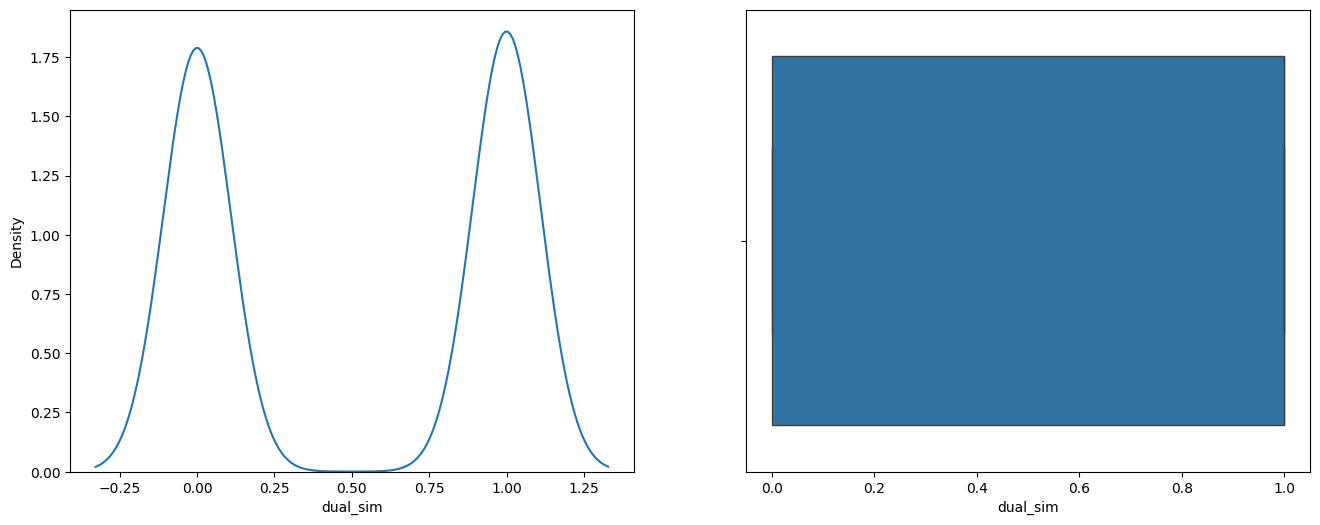

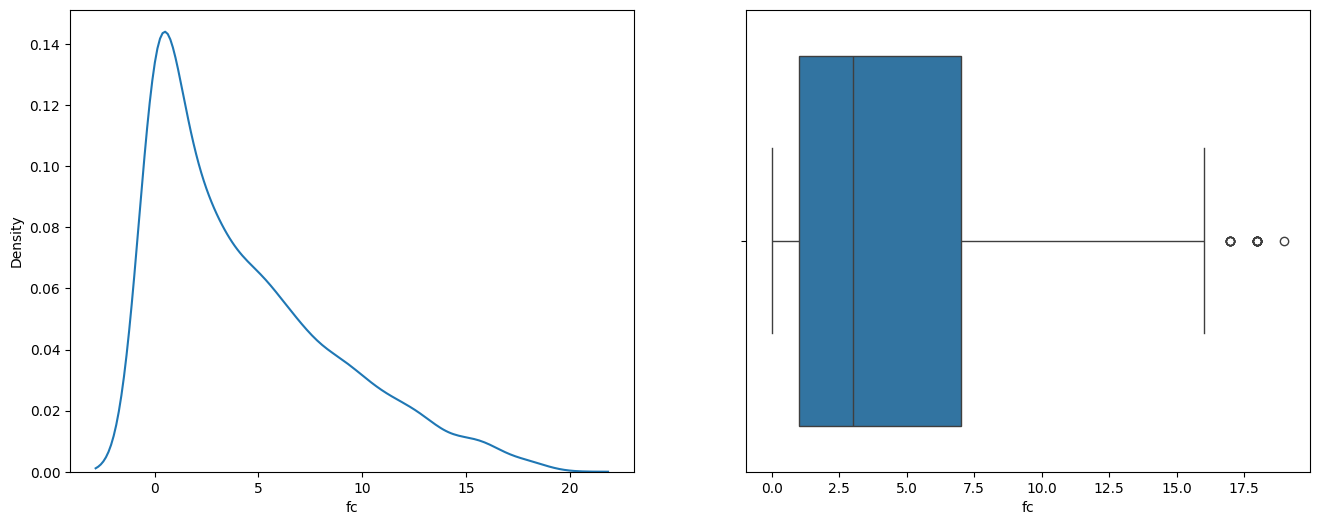

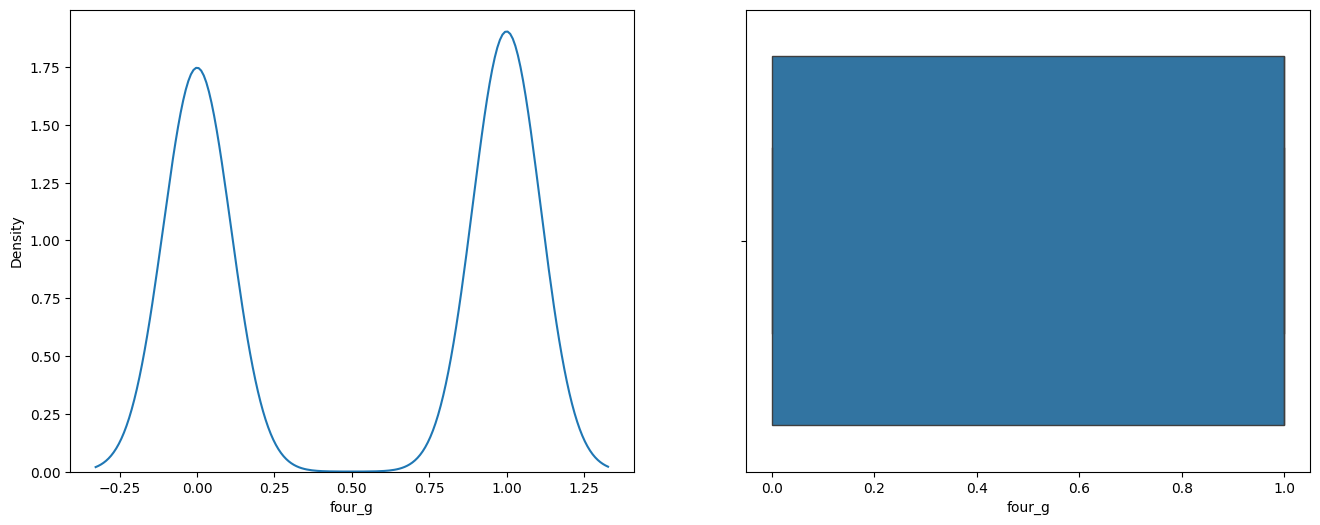

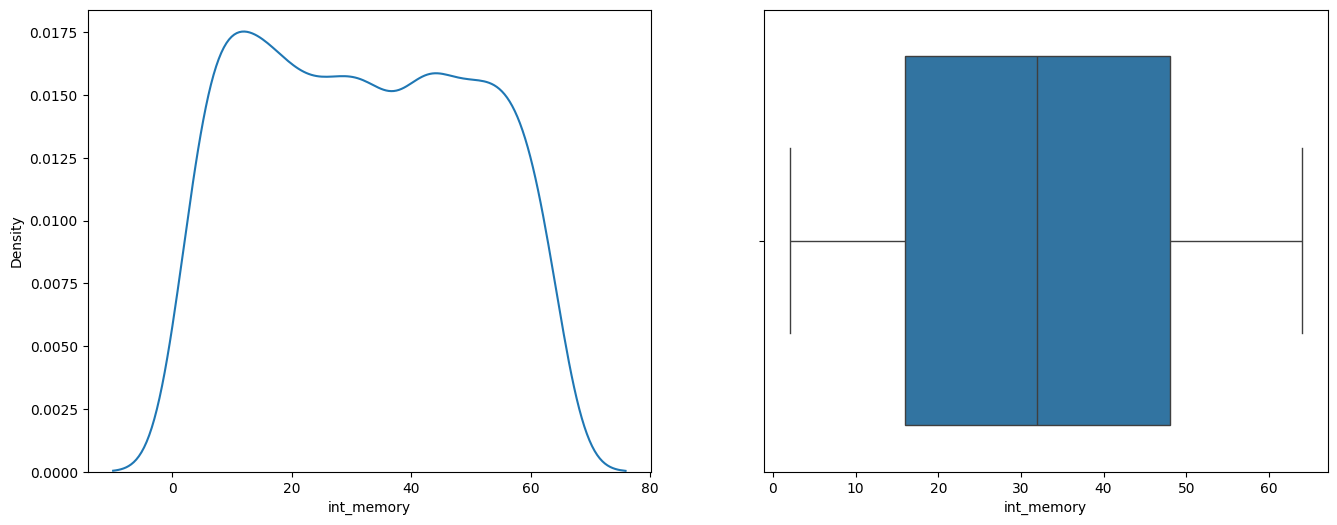

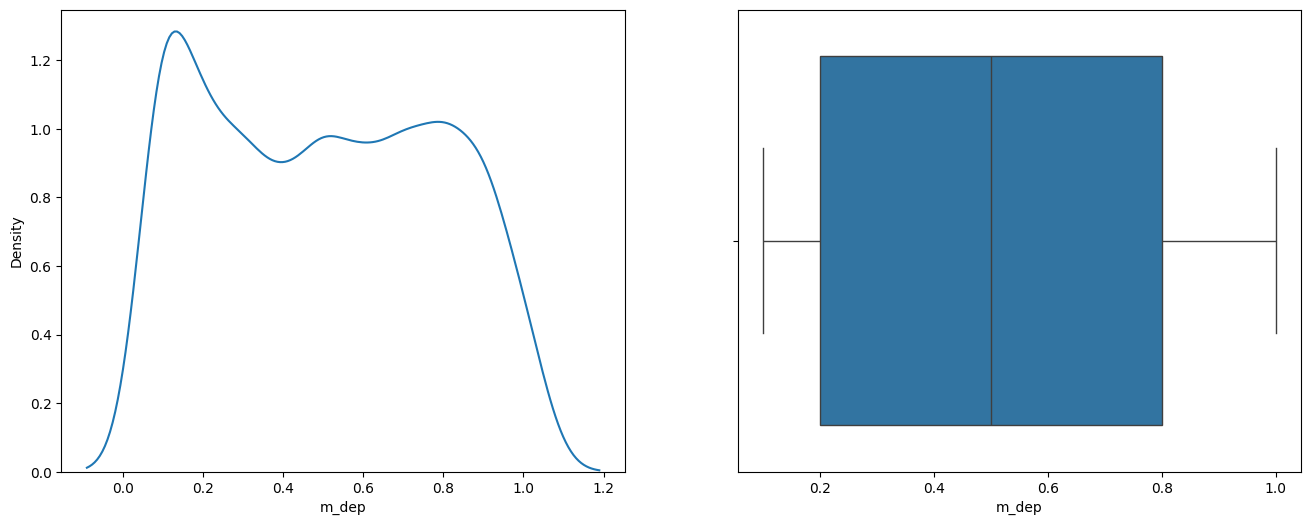

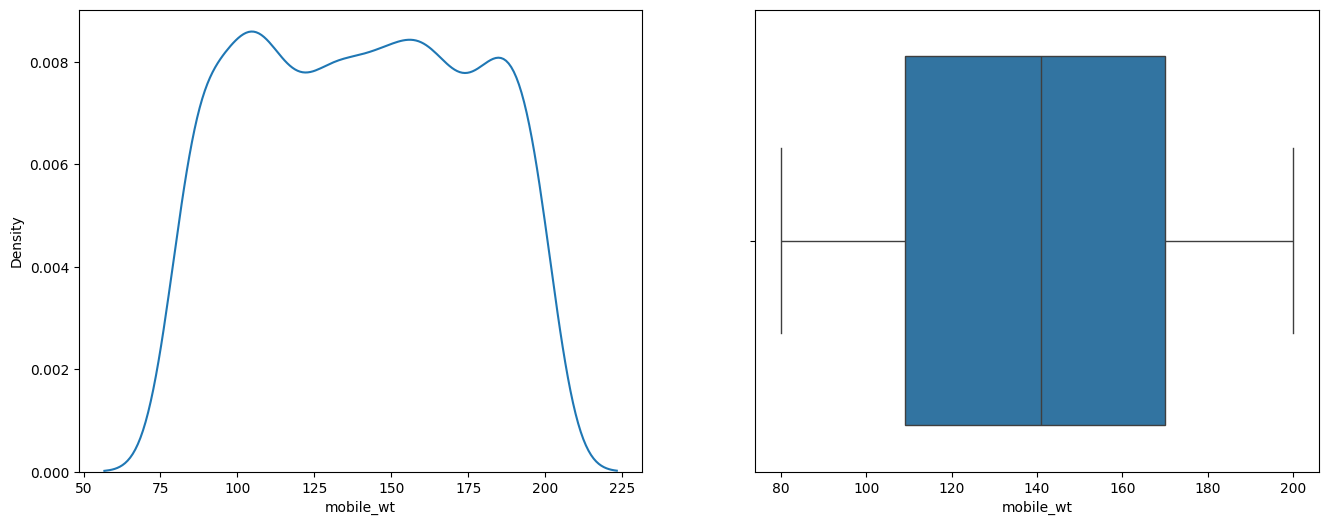

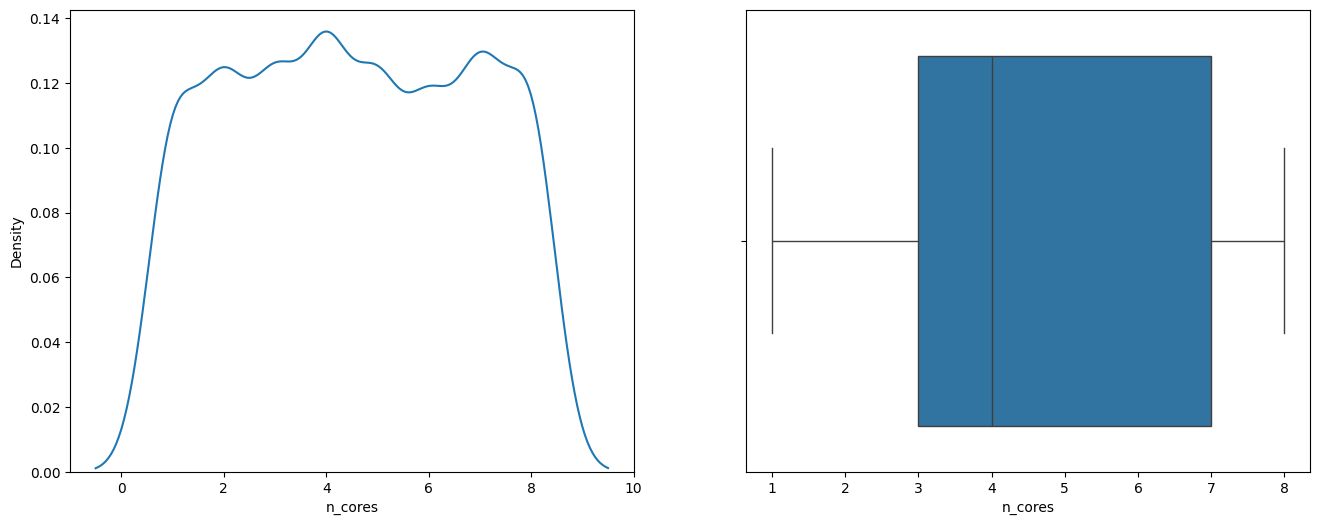

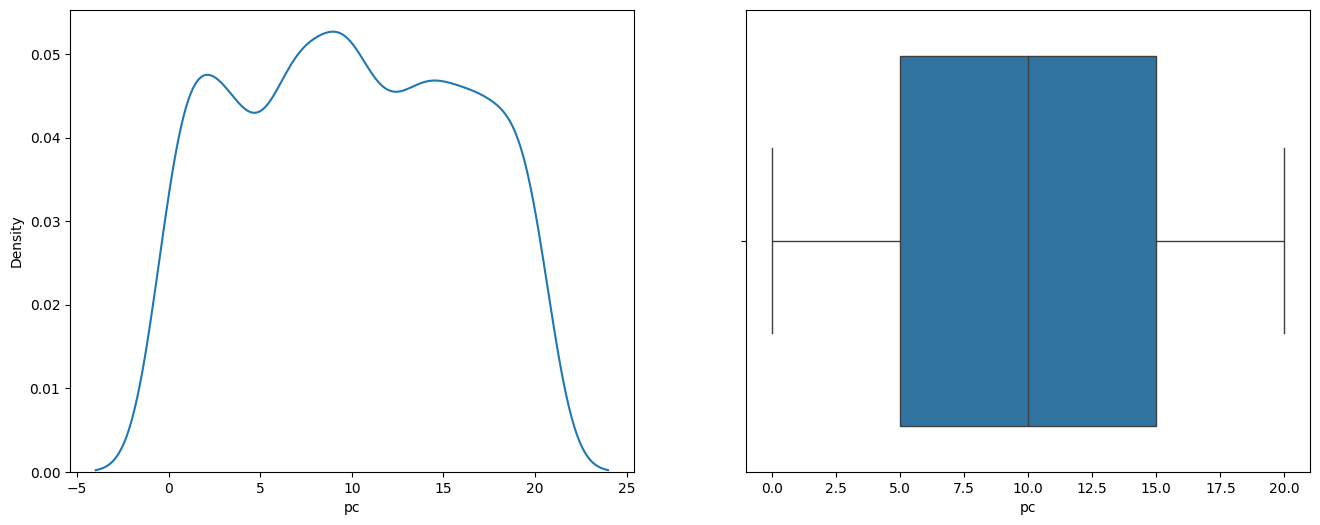

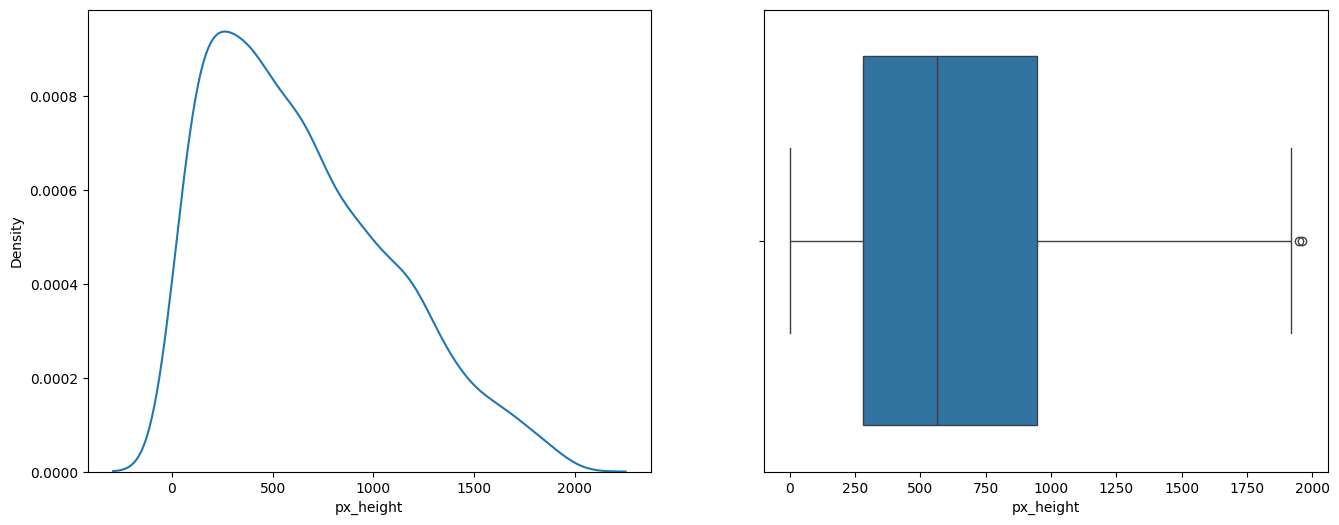

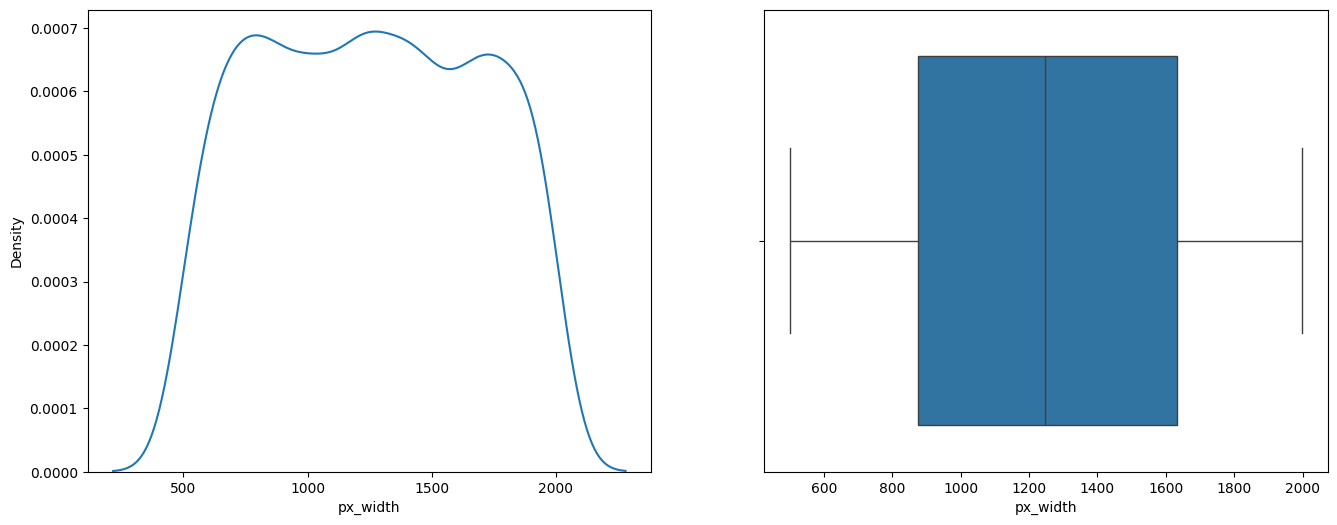

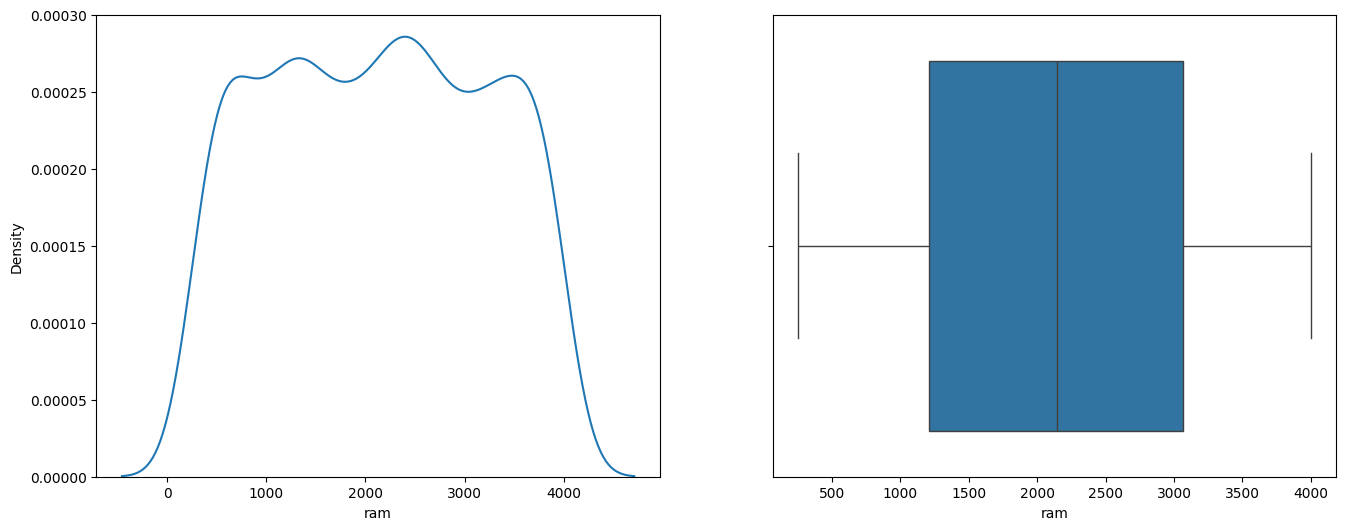

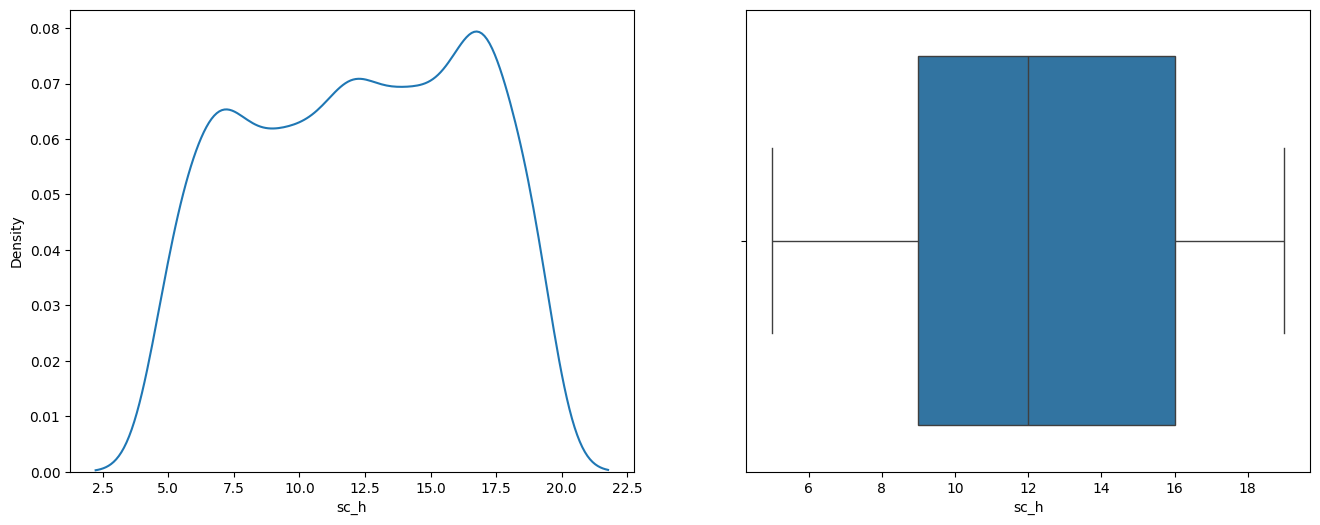

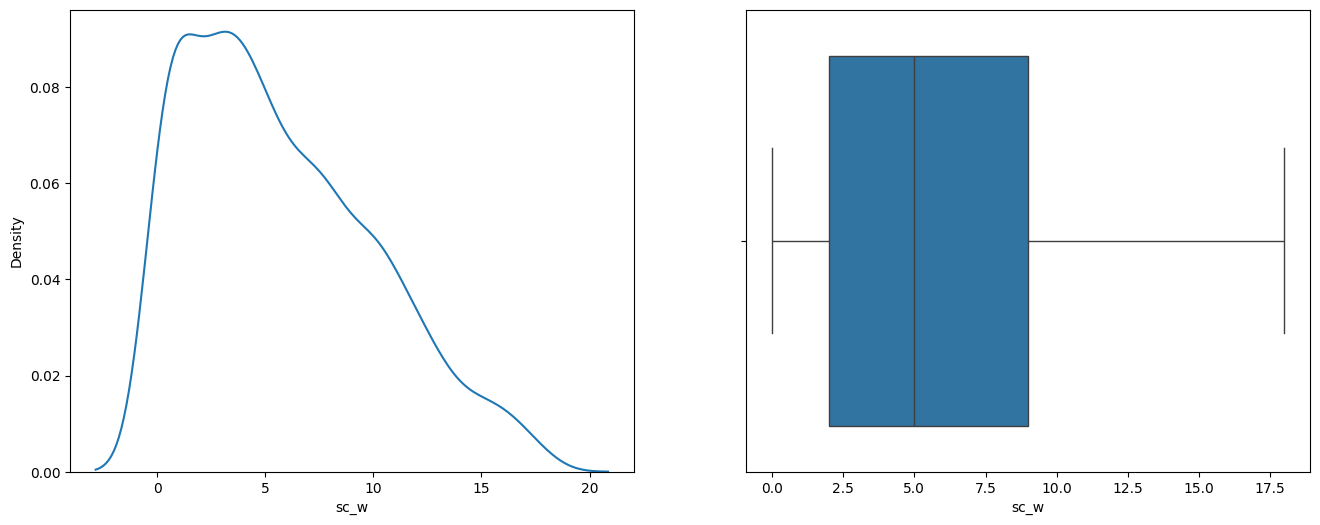

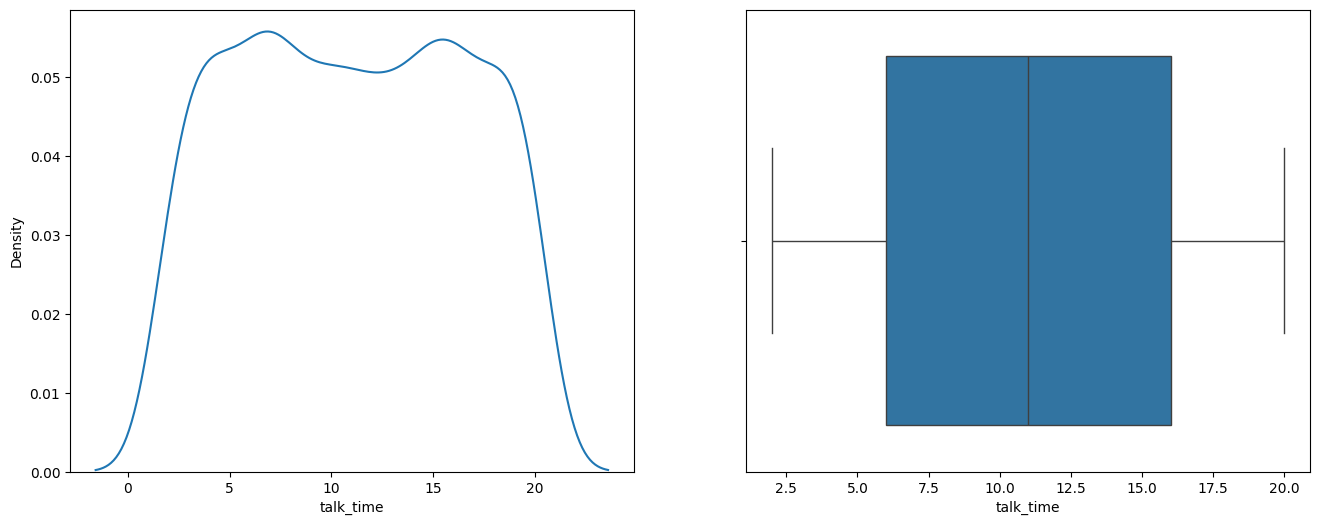

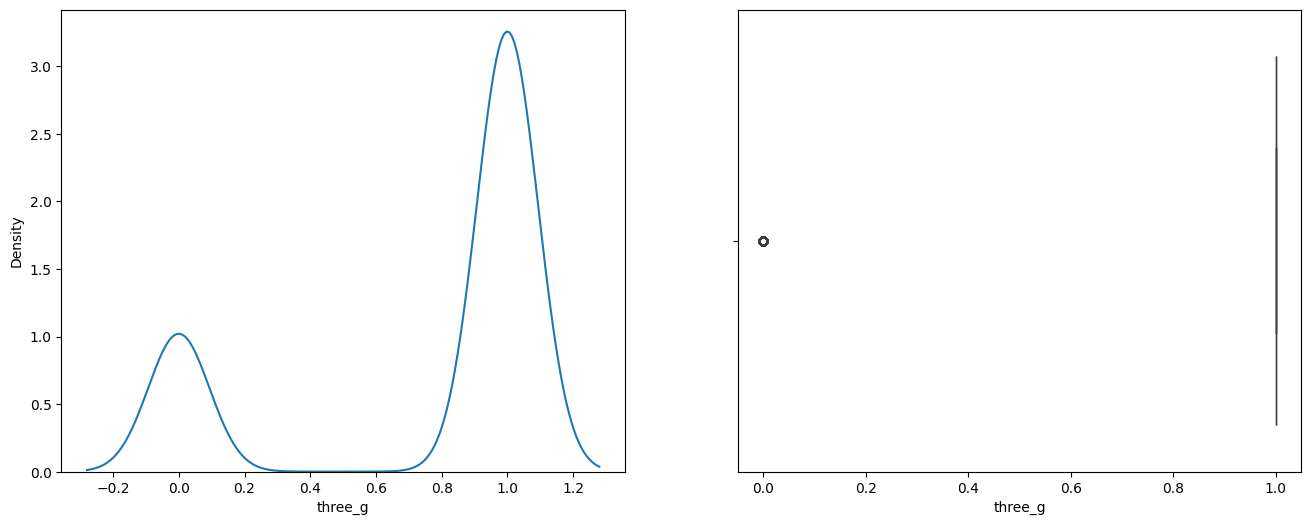

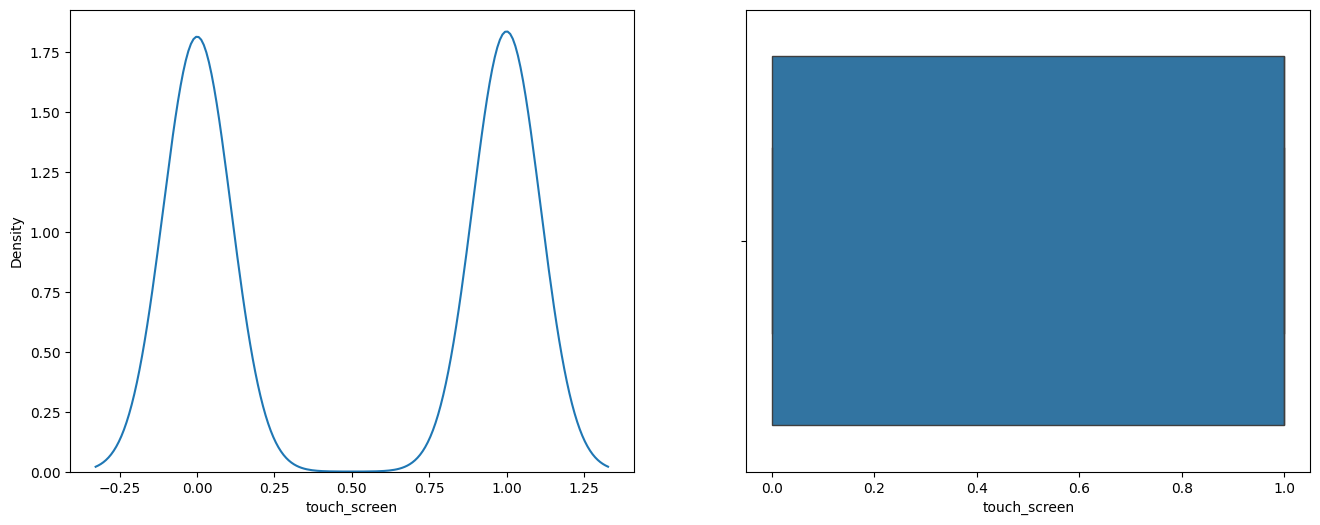

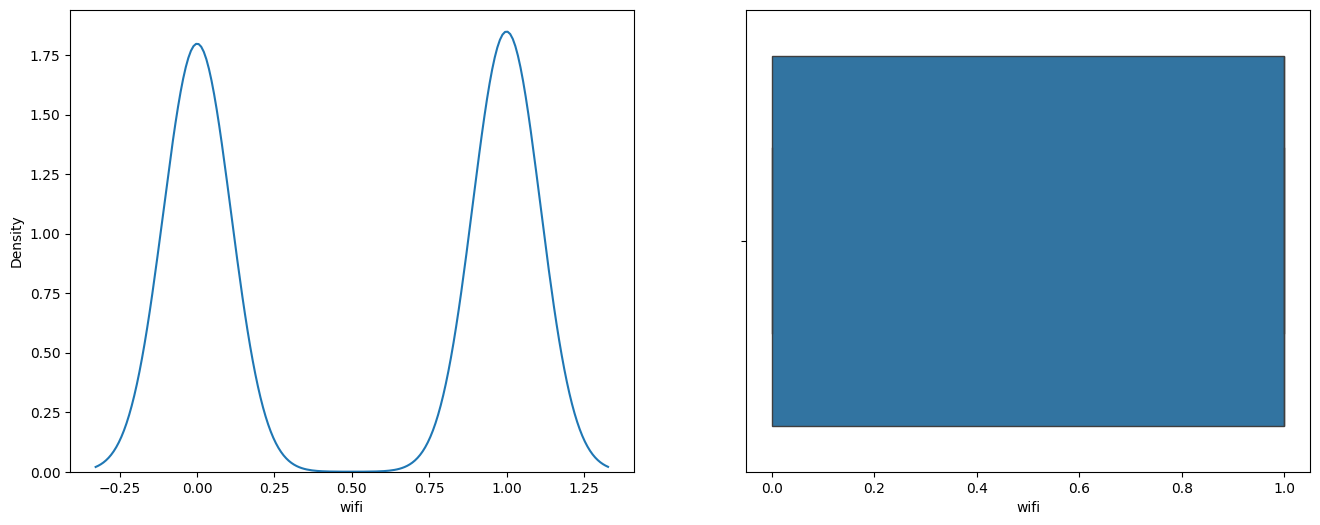

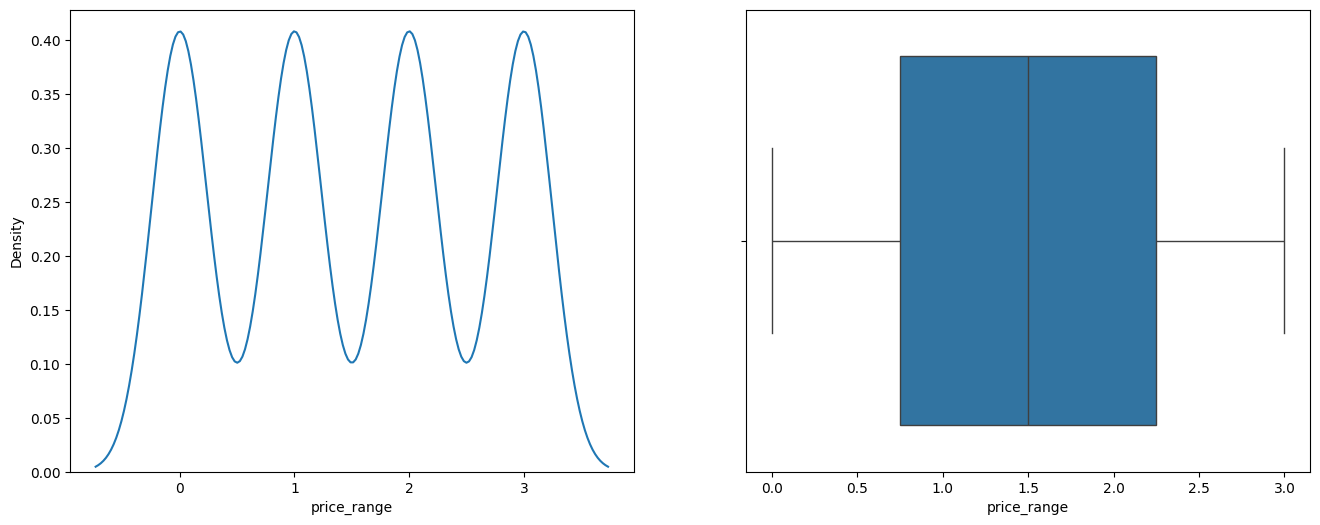

In [9]:
for col in df.columns:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.kdeplot(df[col])
    
    plt.subplot(122)
    sns.boxplot(x=df[col])
    plt.show()

In [10]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [11]:
x1=df.drop("price_range",axis=1)
y1=df["price_range"]

In [12]:
# pip install skfeature-chappers

### Feature Selections

<Axes: >

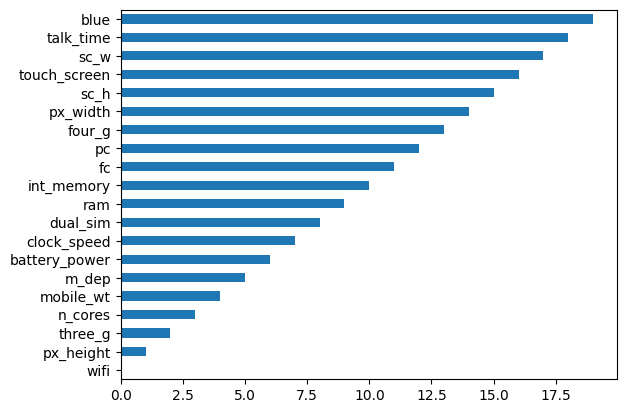

In [13]:

from skfeature.function.similarity_based import fisher_score

fishers_rank = fisher_score.fisher_score(x1.to_numpy(),y1.values)
s1 = pd.Series(fishers_rank, index = x1.columns)
s1.sort_values().plot(kind= 'barh')

<Axes: >

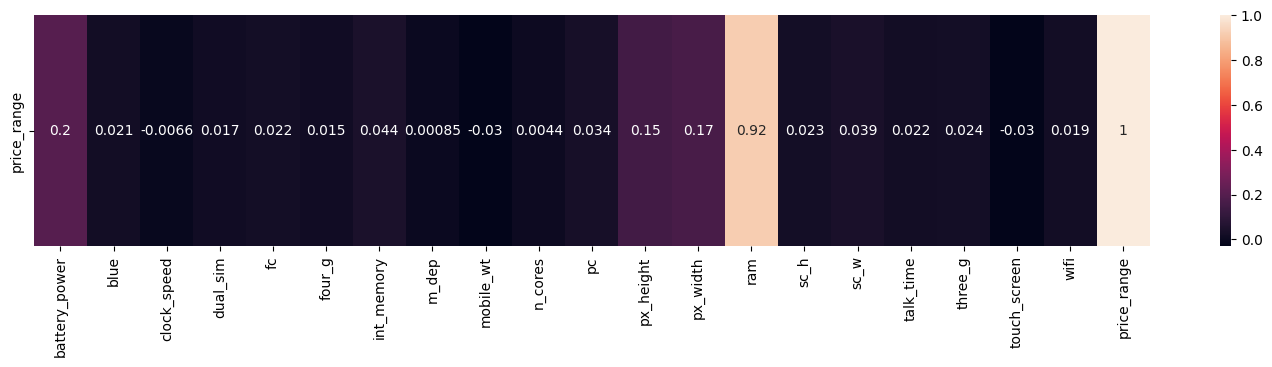

In [14]:
plt.figure(figsize = (18,3))
a=df.corr().tail(1)
sns.heatmap(a,annot=True)

#### Remove Outliers

In [15]:
q1=df["fc"].quantile(0.25)
q3=df["fc"].quantile(0.75)

IQR=q3-q1


upper_tail = q1 + (1.5 * IQR)
lower_tail = q1 - (1.5 * IQR)


outliers_index_above_uppertail = np.where(df['fc'] > upper_tail)
outliers_index_below_lowertail = np.where(df['fc'] < lower_tail)


print(outliers_index_above_uppertail)
print(outliers_index_below_lowertail)


(array([   4,   14,   18,   20,   28,   31,   35,   38,   39,   56,   63,
         65,   66,   78,   81,   83,   93,   95,  113,  128,  138,  157,
        159,  163,  164,  169,  180,  181,  183,  206,  226,  229,  234,
        237,  273,  278,  288,  298,  300,  302,  303,  305,  308,  323,
        350,  351,  361,  372,  384,  386,  387,  392,  401,  408,  412,
        443,  447,  457,  461,  478,  482,  486,  487,  496,  497,  501,
        512,  520,  545,  553,  561,  562,  564,  565,  567,  568,  572,
        584,  592,  625,  634,  647,  656,  658,  670,  682,  684,  713,
        720,  725,  732,  734,  738,  745,  771,  780,  783,  788,  800,
        801,  826,  837,  845,  847,  848,  861,  886,  893,  914,  924,
        926,  927,  933,  980,  990,  991,  993,  994, 1002, 1004, 1006,
       1007, 1018, 1022, 1025, 1040, 1054, 1062, 1073, 1083, 1101, 1105,
       1115, 1117, 1119, 1121, 1128, 1151, 1160, 1163, 1170, 1176, 1182,
       1186, 1191, 1196, 1204, 1208, 1242, 1258, 1

In [16]:
df["fc"].iloc[outliers_index_above_uppertail]=df["fc"].mean()

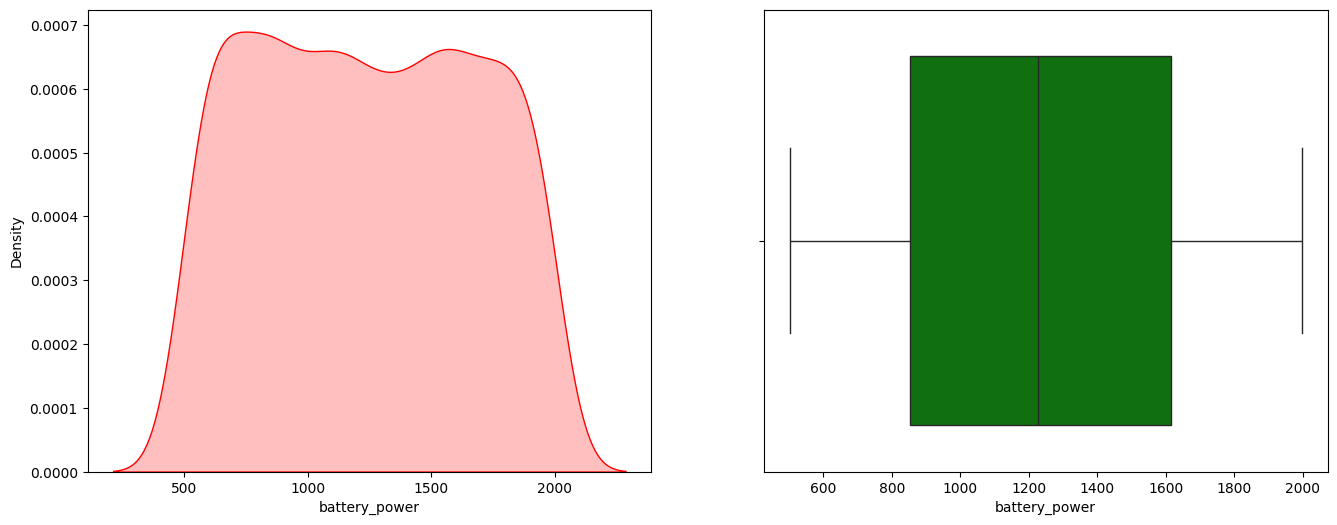

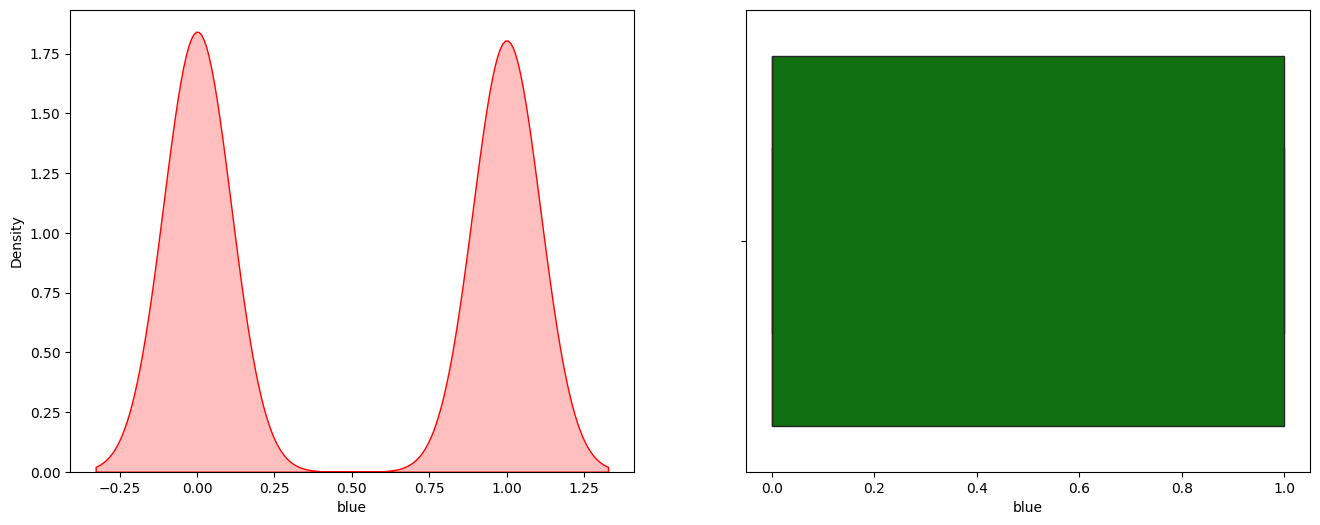

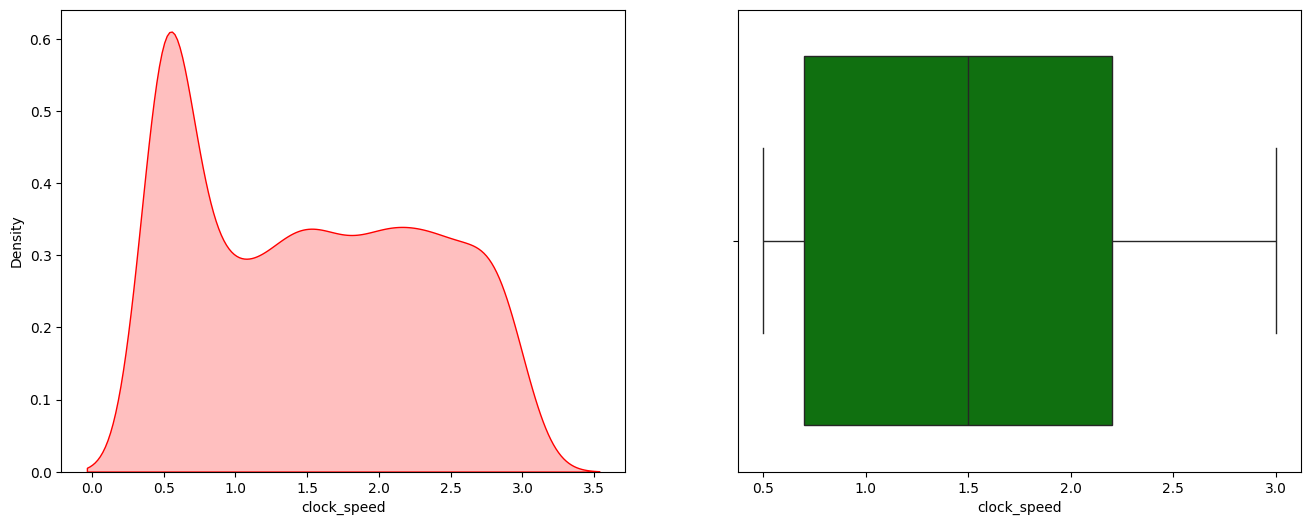

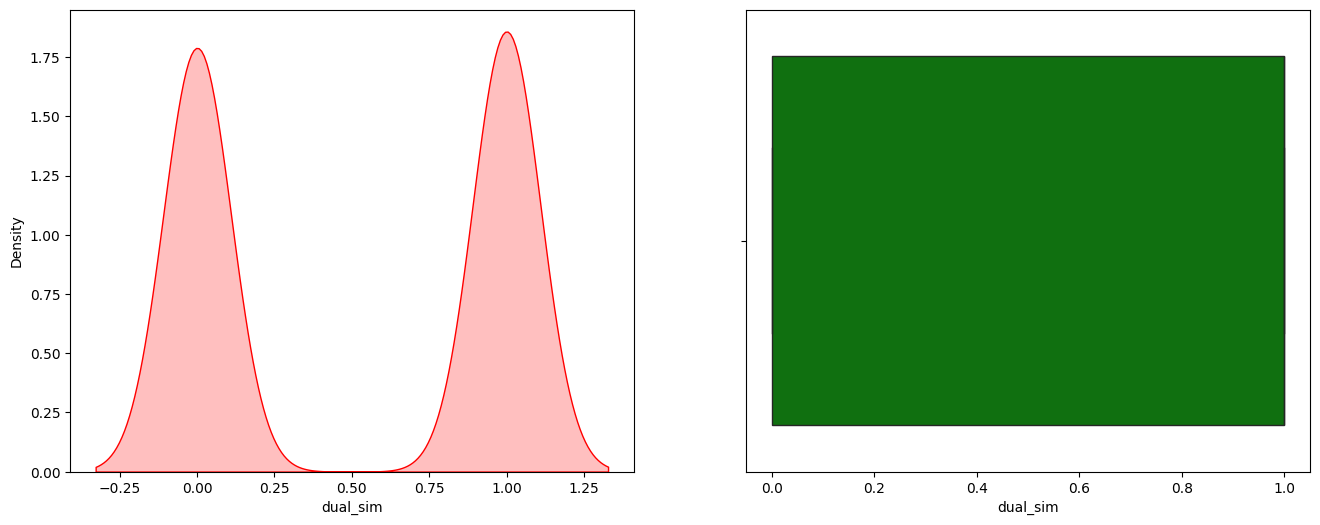

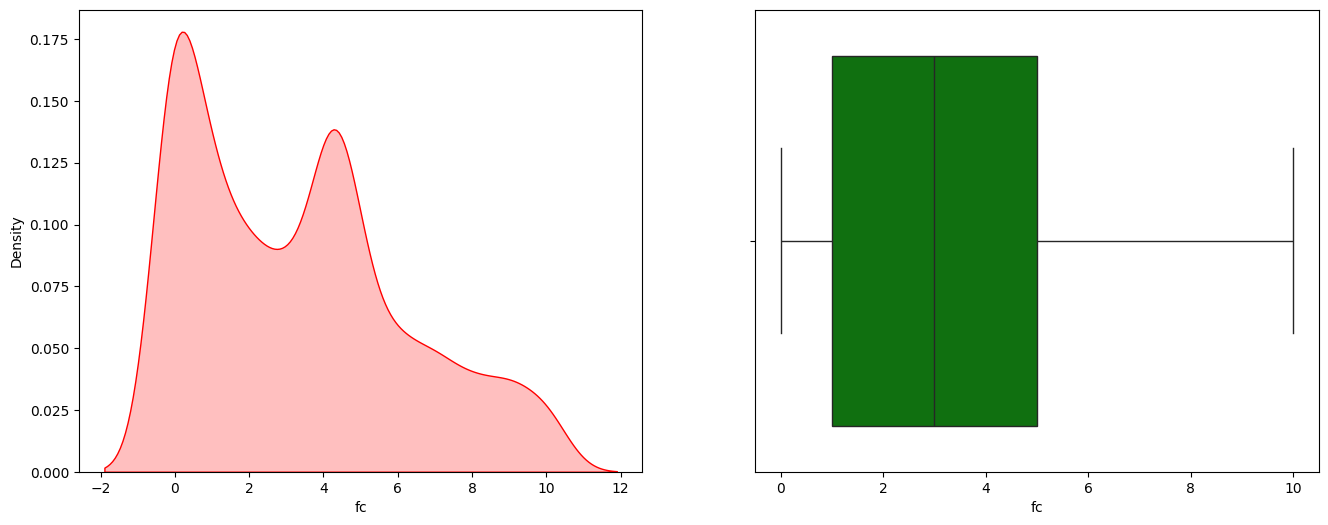

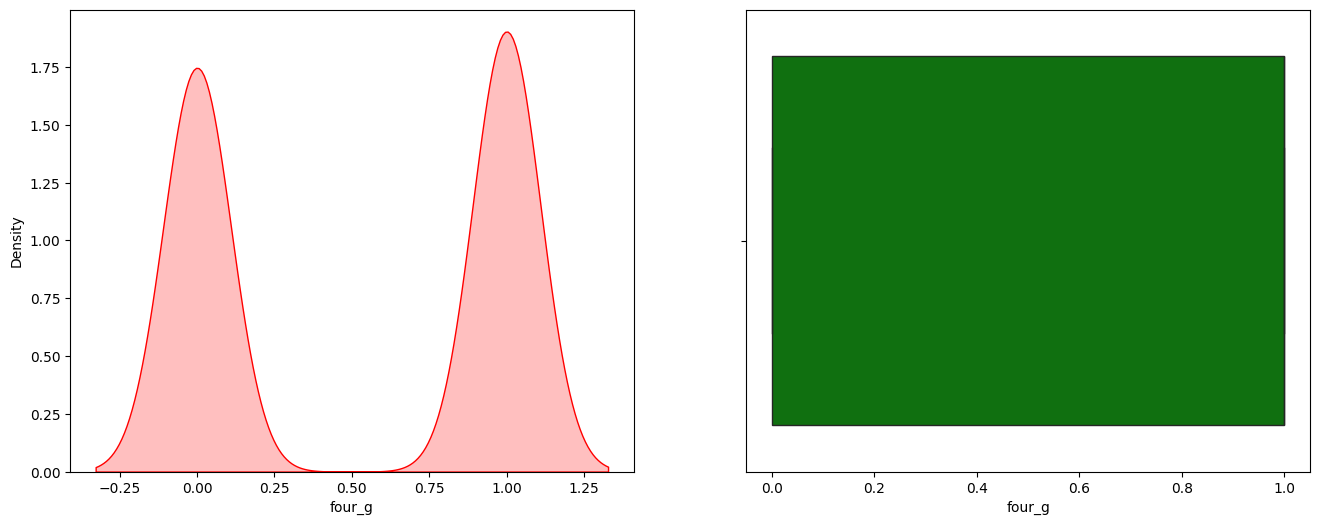

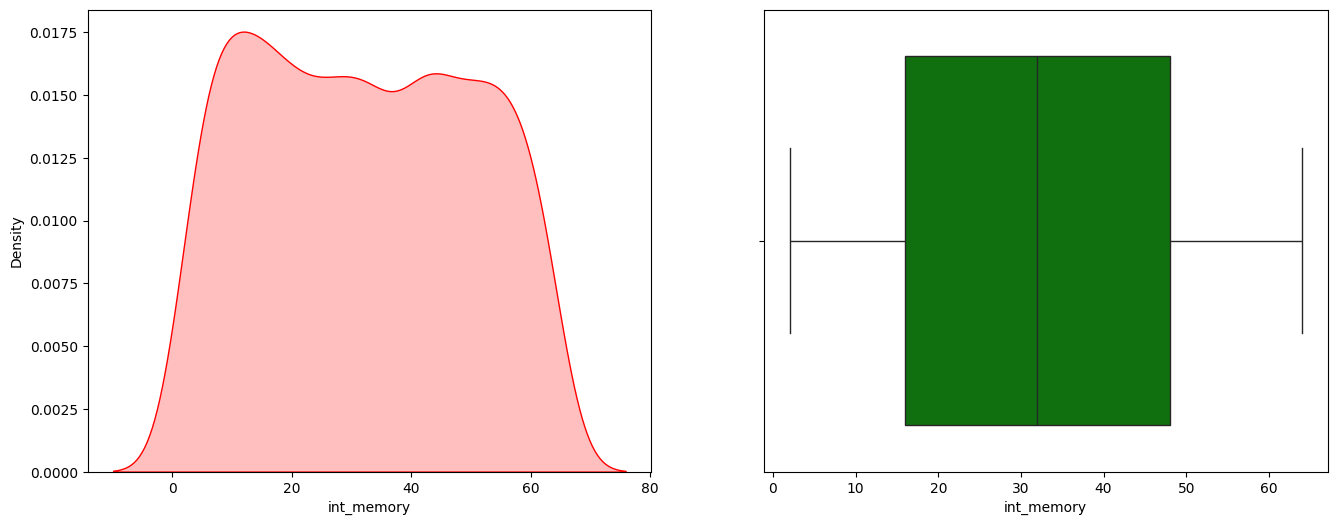

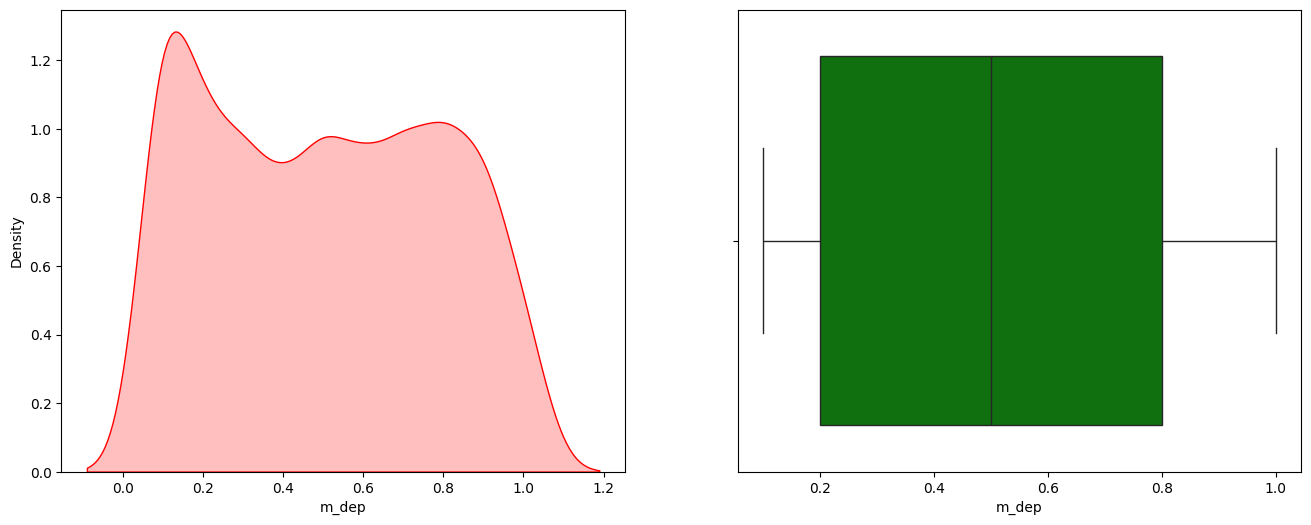

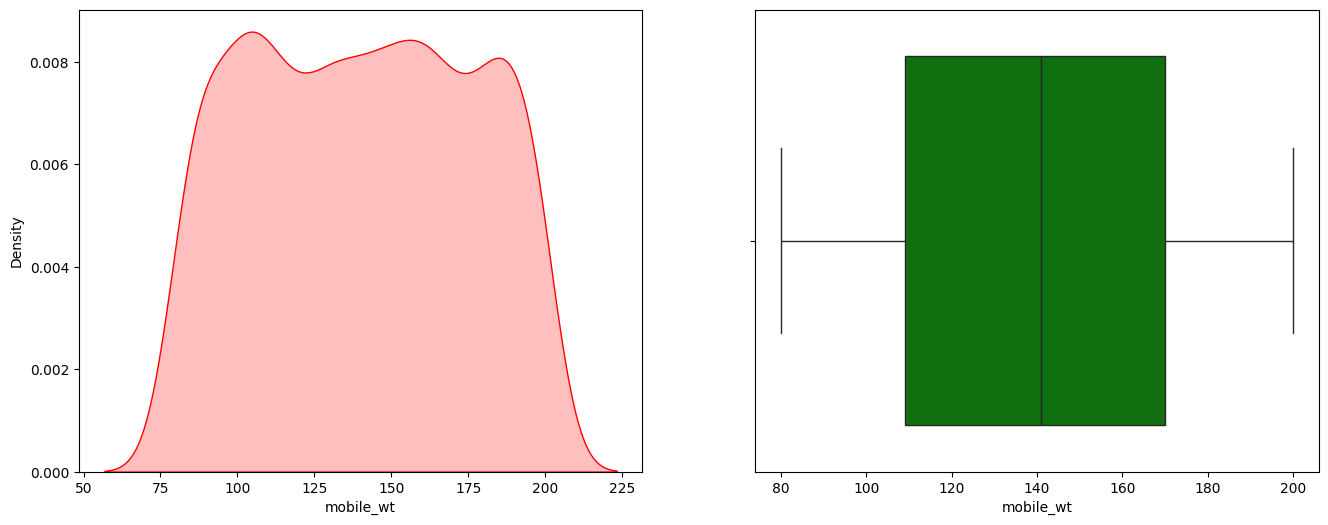

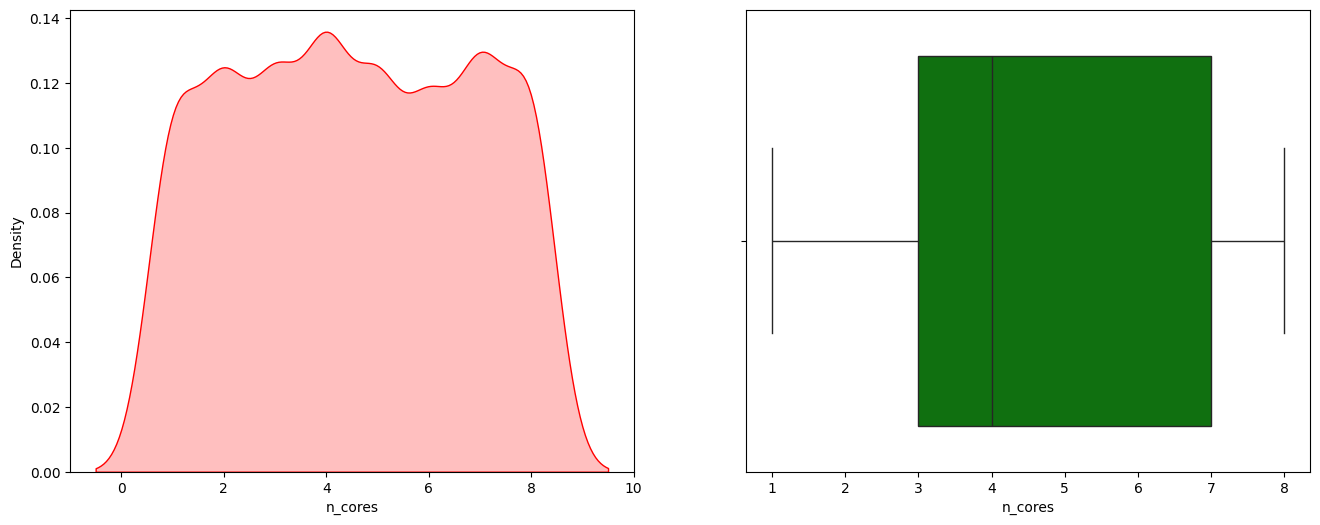

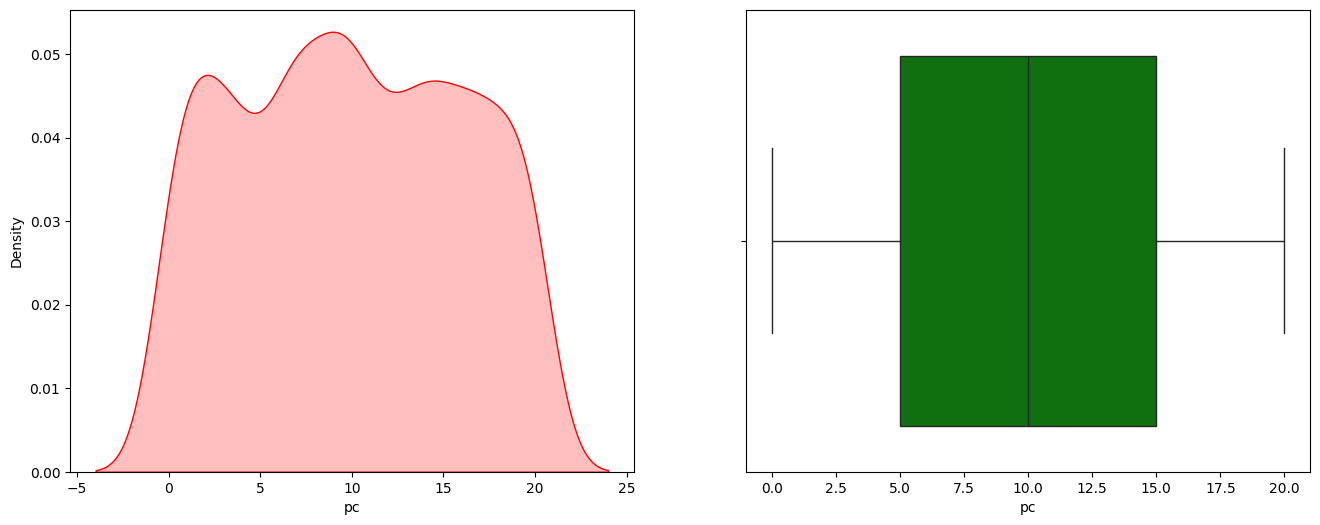

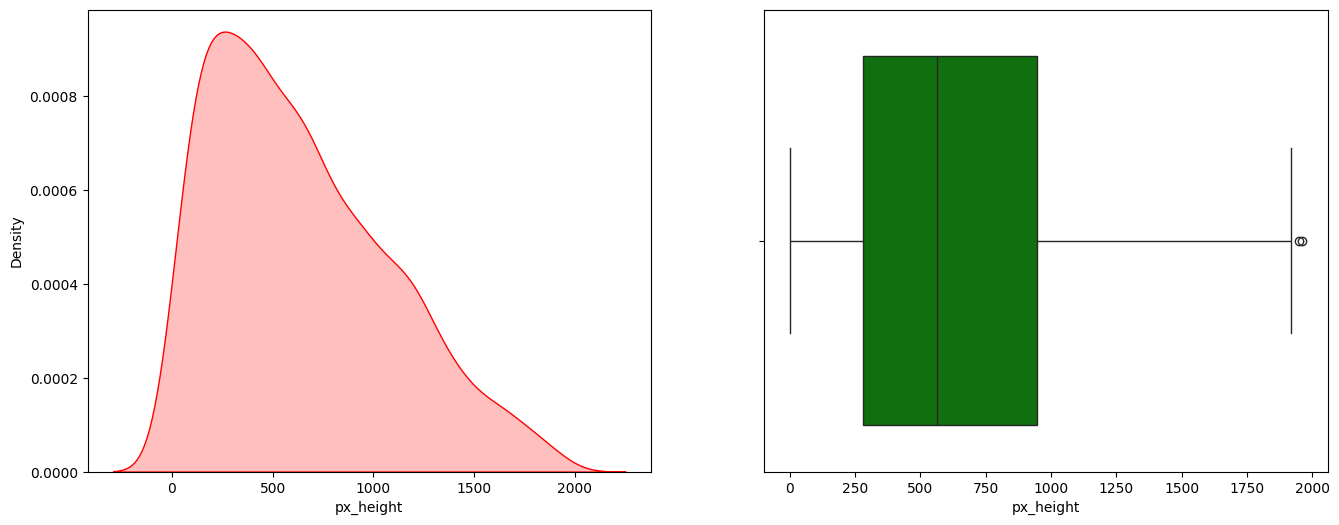

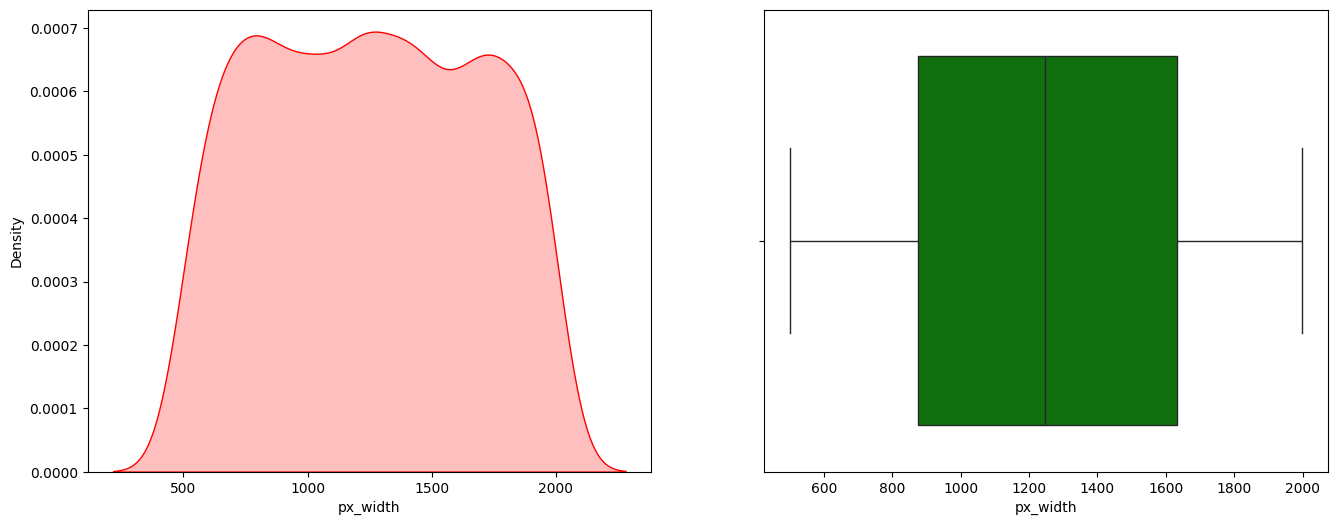

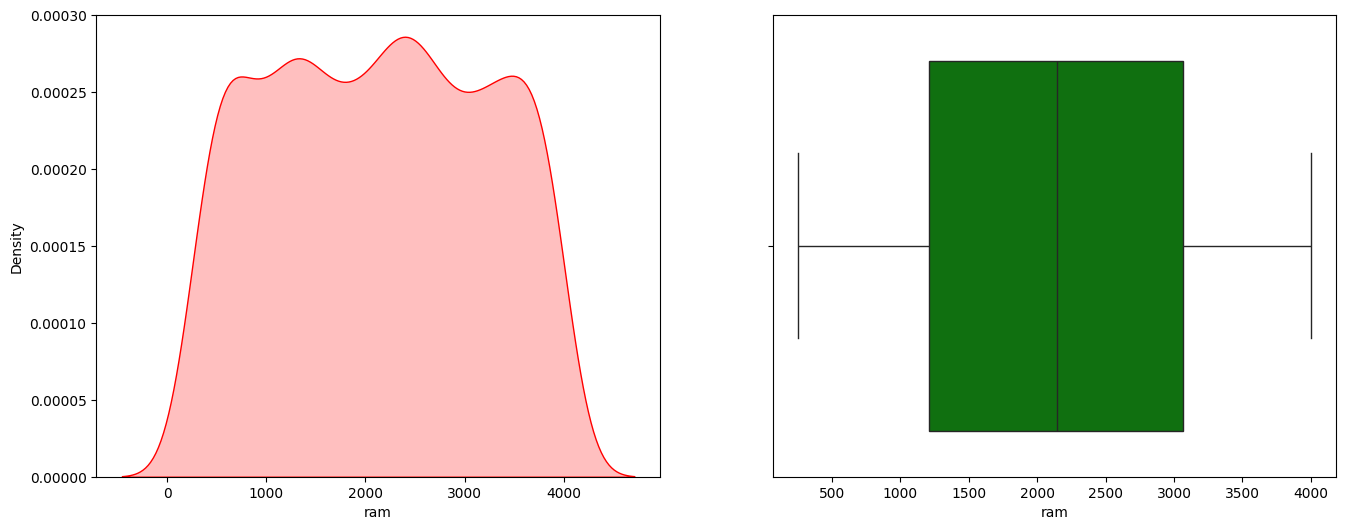

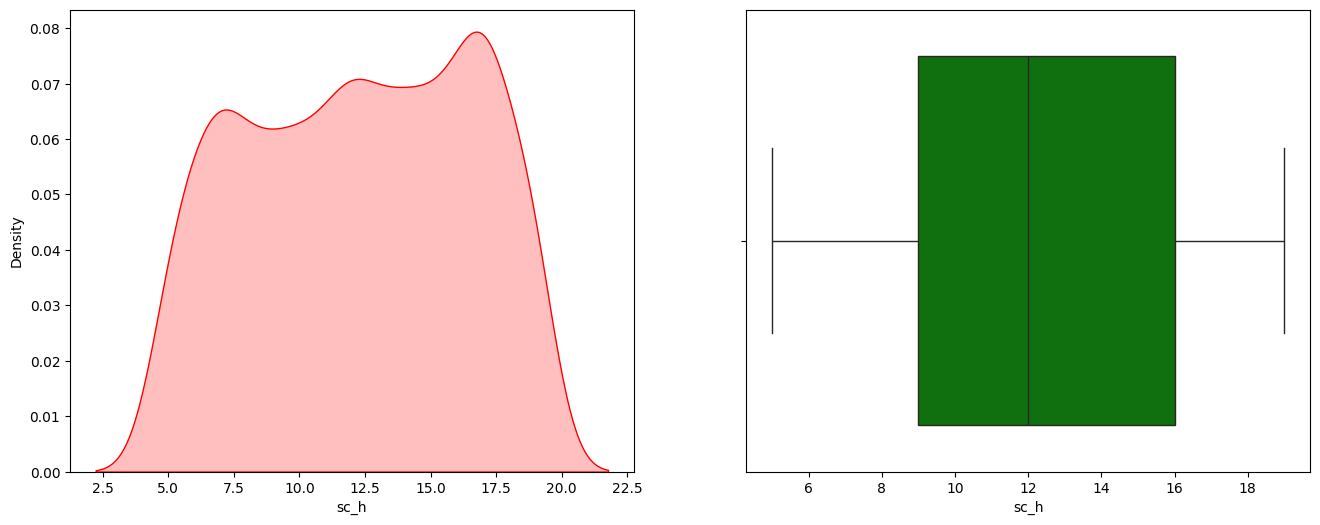

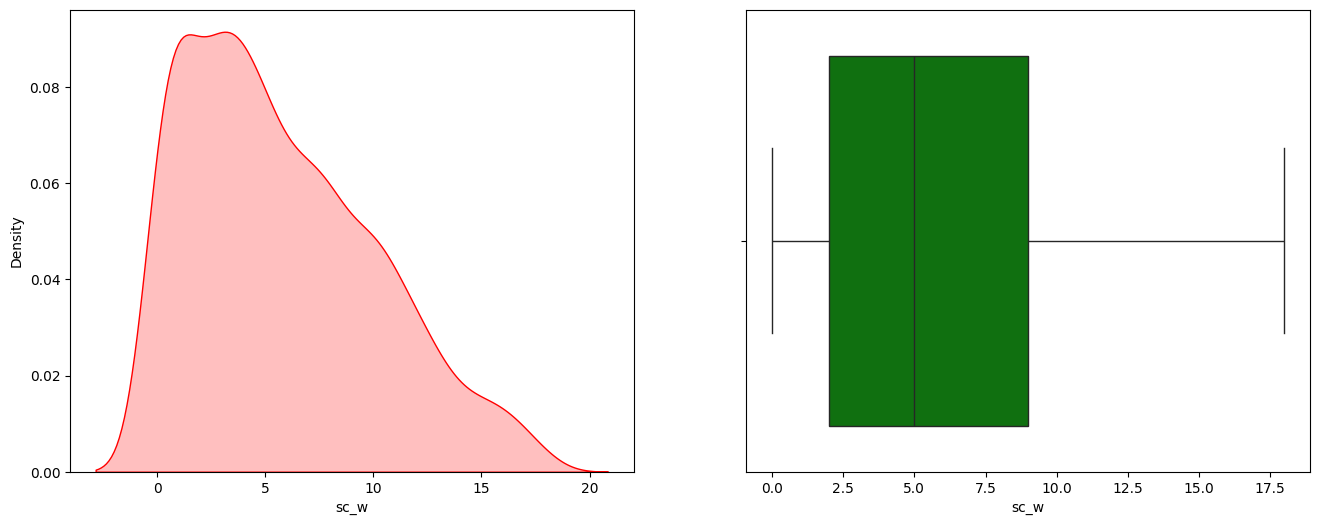

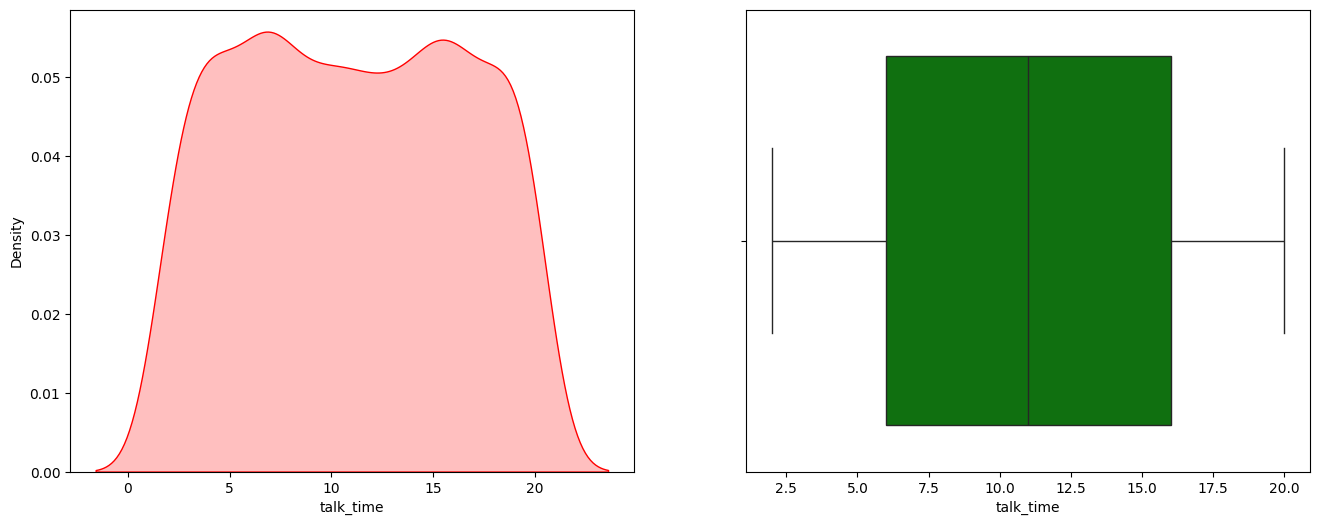

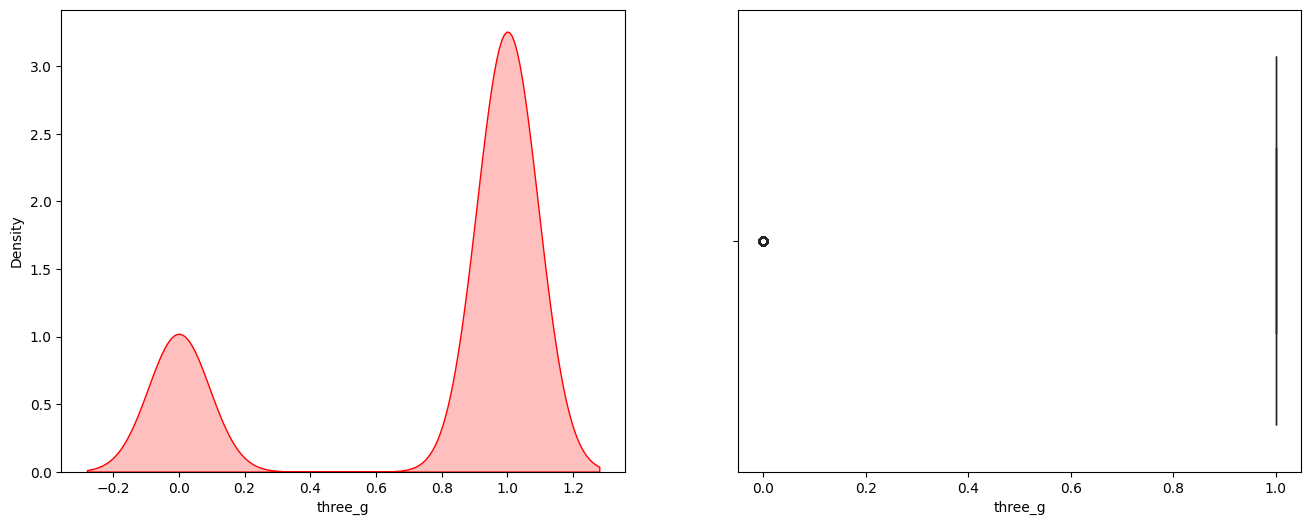

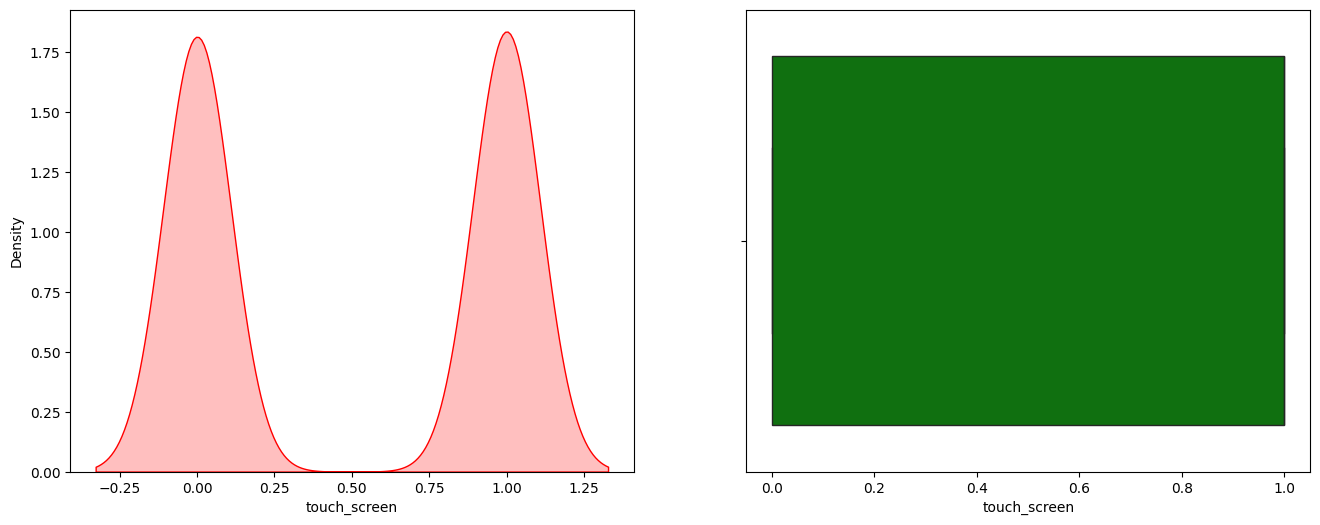

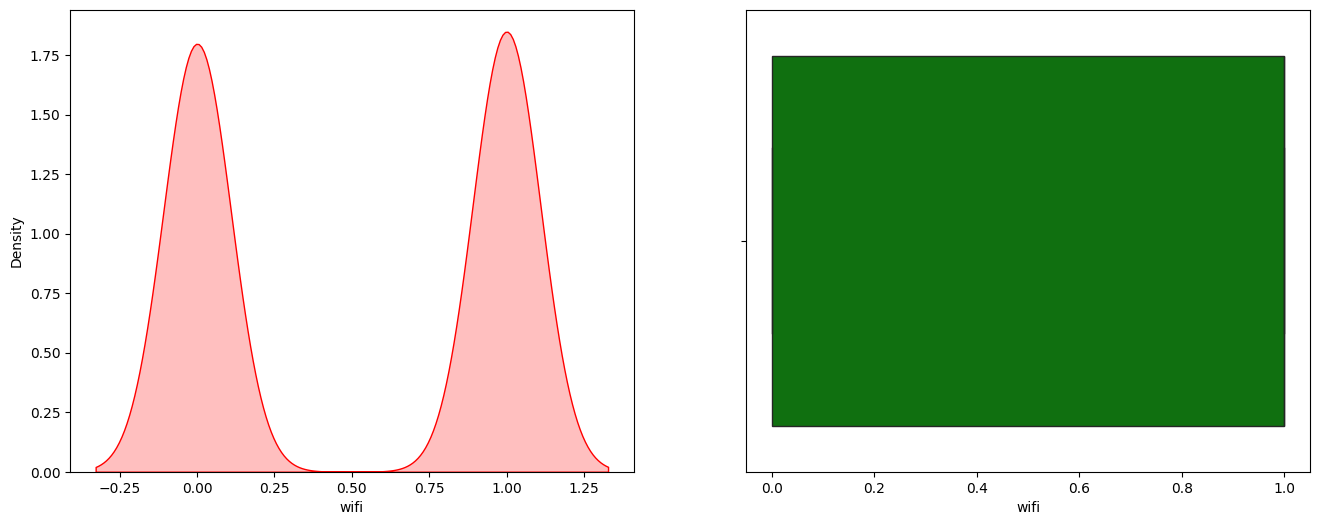

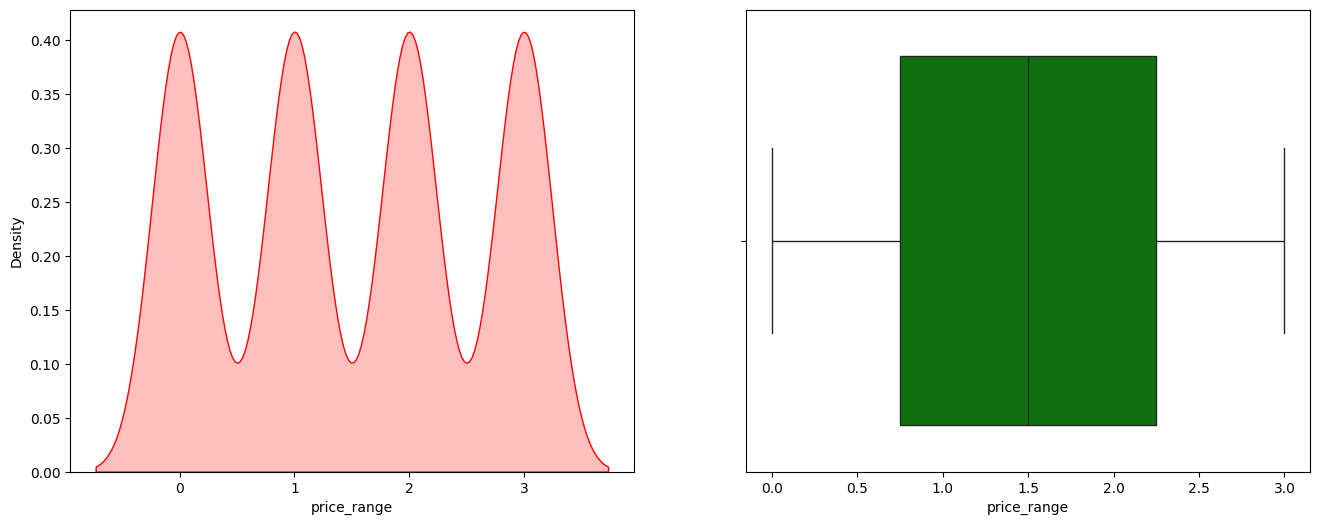

In [17]:
for col in df.columns:
    plt.figure(figsize=(16,6))
    plt.subplot(121)
    sns.kdeplot(df[col],fill=True,color="r")
    
    plt.subplot(122)
    sns.boxplot(x=df[col],color='g')
    plt.show()

In [18]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1.0000,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0.0000,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2.0000,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0.0000,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,4.3095,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0.0000,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0.0000,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1.0000,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4.0000,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


#### Define Independant & Dependant Variables

In [19]:
x=df.drop("price_range",axis=1)
y=df[["price_range"]]

### Model Training

In [20]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.2)

In [21]:
x_train.shape,y_train.shape,x_test.shape

((1600, 20), (1600, 1), (400, 20))

In [22]:
x_train

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
333,1723,1,1.0,0,1.0000,1,7,0.6,126,3,17,384,1361,1213,5,0,16,1,1,1
721,808,0,0.5,1,0.0000,0,8,0.1,192,4,1,618,1891,3762,15,9,12,1,0,1
1352,798,1,0.5,1,7.0000,0,2,0.8,148,2,15,497,627,3593,14,9,3,0,1,0
1680,1826,1,0.5,1,5.0000,1,49,0.6,172,8,6,973,1633,1612,17,9,17,1,1,0
156,637,0,2.3,0,3.0000,1,60,0.8,97,4,4,1125,1989,374,18,4,8,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1558,769,0,0.5,1,4.3095,1,54,0.2,112,4,19,1385,1780,941,15,8,20,1,0,1
1608,1129,1,0.8,1,9.0000,1,21,0.6,116,2,10,1128,1702,1400,11,0,13,1,1,0
493,1902,0,2.8,1,6.0000,0,50,0.8,124,8,9,1142,1393,343,11,8,18,0,1,0
527,1780,1,0.5,0,6.0000,0,27,0.1,190,4,11,1331,1463,2776,19,17,14,1,1,1


### LogisticRegression

In [23]:
lr=LogisticRegression(random_state=1)
lr.fit(x_train,y_train)

LogisticRegression(random_state=1)

In [24]:
#####   Trainig ####

y_pred_train = lr.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.63
**************************************************
Confussion Matrix =  [[327  69   6   0]
 [ 67 197 102  25]
 [  1  87 189 129]
 [  0   3 103 295]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.83      0.81      0.82       402
           1       0.55      0.50      0.53       391
           2       0.47      0.47      0.47       406
           3       0.66      0.74      0.69       401

    accuracy                           0.63      1600
   macro avg       0.63      0.63      0.63      1600
weighted avg       0.63      0.63      0.63      1600



In [25]:
#####   Testing ####

y_pred_test = lr.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.6325
**************************************************
Confussion Matrix =  [[80 18  0  0]
 [25 51 25  8]
 [ 0 23 42 29]
 [ 0  0 19 80]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.76      0.82      0.79        98
           1       0.55      0.47      0.51       109
           2       0.49      0.45      0.47        94
           3       0.68      0.81      0.74        99

    accuracy                           0.63       400
   macro avg       0.62      0.63      0.63       400
weighted avg       0.62      0.63      0.62       400



In [26]:
accuracy_train = 0.63
accuracy_test = 0.63

### KNN

In [27]:
kn_clf=KNeighborsClassifier(n_neighbors=12,p=2)
kn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=12)

In [28]:
y_p_train = kn_clf.predict(x_train)

In [29]:
#####   Trainig ####

y_pred_train = kn_clf.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.950625
**************************************************
Confussion Matrix =  [[397   5   0   0]
 [ 14 372   5   0]
 [  0  26 370  10]
 [  0   0  19 382]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       402
           1       0.92      0.95      0.94       391
           2       0.94      0.91      0.92       406
           3       0.97      0.95      0.96       401

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [30]:
#####   Testing ####

y_pred_test = kn_clf.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.9375
**************************************************
Confussion Matrix =  [[98  0  0  0]
 [11 97  1  0]
 [ 0  4 87  3]
 [ 0  0  6 93]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        98
           1       0.96      0.89      0.92       109
           2       0.93      0.93      0.93        94
           3       0.97      0.94      0.95        99

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [31]:
accuracy_train = 0.95
accuracy_test =  0.94

k=  14
train_r2_score list  
 [1.0, 0.951, 0.961, 0.948, 0.95, 0.947, 0.952, 0.948, 0.956, 0.951, 0.952, 0.951, 0.953, 0.954]
test_r2_score list  
 [0.915, 0.905, 0.932, 0.94, 0.932, 0.922, 0.928, 0.928, 0.93, 0.935, 0.94, 0.938, 0.94, 0.94]


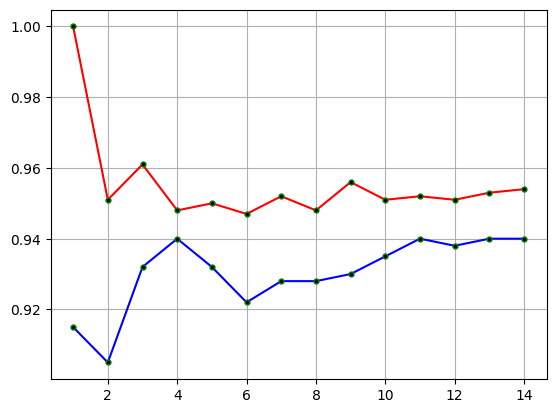

In [32]:
### p=2

k_values = np.arange(1,15)
train_r2_score = []
test_r2_score = []
for k in k_values:
    kn_clf=KNeighborsClassifier(n_neighbors=k, p=2)
    kn_clf.fit(x_train,y_train)
    train_r2_score.append(np.around(kn_clf.score(x_train, y_train),3))
    test_r2_score.append(np.around(kn_clf.score(x_test, y_test),3))

print("k= ",k)
print("train_r2_score list  \n",train_r2_score)
print("test_r2_score list  \n",test_r2_score)

plt.plot(k_values,train_r2_score,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.plot(k_values,test_r2_score,c="blue",marker=".",ms=7,mfc="black",mec="green")
plt.grid(True)
plt.show()

k=  14
train_r2_score list  
 [1.0, 0.946, 0.962, 0.944, 0.953, 0.949, 0.956, 0.949, 0.955, 0.944, 0.951, 0.948, 0.952, 0.944]
test_r2_score list  
 [0.912, 0.905, 0.925, 0.93, 0.94, 0.928, 0.928, 0.925, 0.942, 0.942, 0.948, 0.948, 0.95, 0.952]


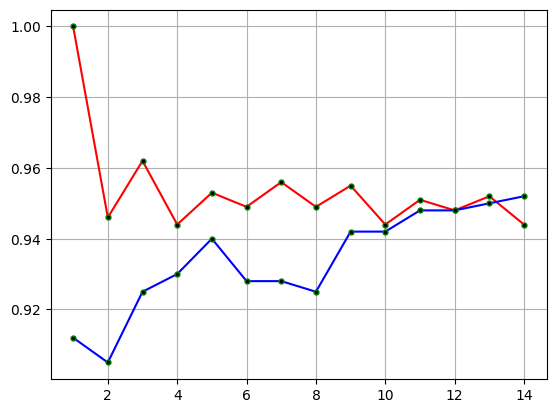

In [33]:
### p=1

k_values = np.arange(1,15)
train_r2_score = []
test_r2_score = []
for k in k_values:
    kn_cl=KNeighborsClassifier(n_neighbors=k, p=1)
    kn_cl.fit(x_train,y_train)
    train_r2_score.append(np.around(kn_cl.score(x_train, y_train),3))
    test_r2_score.append(np.around(kn_cl.score(x_test, y_test),3))

print("k= ",k)
print("train_r2_score list  \n",train_r2_score)
print("test_r2_score list  \n",test_r2_score)

plt.plot(k_values,train_r2_score,c="red",marker=".",ms=7,mfc="black",mec="green")
plt.plot(k_values,test_r2_score,c="blue",marker=".",ms=7,mfc="black",mec="green")
plt.grid(True)
plt.show()

In [34]:
###  Best neighbors=10,p=1 #####

kn_cl=KNeighborsClassifier(n_neighbors=11,p=1)
kn_cl.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11, p=1)

In [35]:
#####   Trainig ####

y_pred_train = kn_clf.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.95375
**************************************************
Confussion Matrix =  [[396   6   0   0]
 [ 14 374   3   0]
 [  0  23 373  10]
 [  0   0  18 383]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       402
           1       0.93      0.96      0.94       391
           2       0.95      0.92      0.93       406
           3       0.97      0.96      0.96       401

    accuracy                           0.95      1600
   macro avg       0.95      0.95      0.95      1600
weighted avg       0.95      0.95      0.95      1600



In [36]:
#####   Testing ####

y_pred_test = kn_clf.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.94
**************************************************
Confussion Matrix =  [[98  0  0  0]
 [12 96  1  0]
 [ 0  4 88  2]
 [ 0  0  5 94]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.89      1.00      0.94        98
           1       0.96      0.88      0.92       109
           2       0.94      0.94      0.94        94
           3       0.98      0.95      0.96        99

    accuracy                           0.94       400
   macro avg       0.94      0.94      0.94       400
weighted avg       0.94      0.94      0.94       400



In [37]:
accuracy_train = 0.95
accuracy_test =  0.94

### Decison_Tree

In [38]:
dt=DecisionTreeClassifier(random_state=1)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=1)

In [39]:
#####   Trainig ####

y_pred_train = dt.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  1.0
**************************************************
Confussion Matrix =  [[402   0   0   0]
 [  0 391   0   0]
 [  0   0 406   0]
 [  0   0   0 401]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       406
           3       1.00      1.00      1.00       401

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [40]:
#####   Testing ####

y_pred_test = dt.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.85
**************************************************
Confussion Matrix =  [[94  4  0  0]
 [16 82 11  0]
 [ 0  5 76 13]
 [ 0  0 11 88]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.85      0.96      0.90        98
           1       0.90      0.75      0.82       109
           2       0.78      0.81      0.79        94
           3       0.87      0.89      0.88        99

    accuracy                           0.85       400
   macro avg       0.85      0.85      0.85       400
weighted avg       0.85      0.85      0.85       400



In [41]:
accuracy_train = 1
accuracy_test = 0.85

#### Hyperparameter Tuning

In [42]:
dt=DecisionTreeClassifier(random_state=1)

hyp_grid={'criterion' : ['gini',"entropy"],
    'max_depth' : np.arange(5,10),
    'min_samples_split' : np.arange(10,15),
    'min_samples_leaf' : np.arange(3,8,)}

gs_cv=GridSearchCV(dt,param_grid=hyp_grid,cv=3,n_jobs=-1)
gs_cv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7]),
                         'min_samples_split': array([10, 11, 12, 13, 14])})

In [43]:
gs_cv.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=14, random_state=1)

In [44]:
dtc=gs_cv.best_estimator_
dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=6,
                       min_samples_split=14, random_state=1)

In [45]:
#####   Trainig ####

y_pred_train = dtc.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.941875
**************************************************
Confussion Matrix =  [[387  15   0   0]
 [ 14 359  18   0]
 [  0  11 383  12]
 [  0   0  23 378]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.97      0.96      0.96       402
           1       0.93      0.92      0.93       391
           2       0.90      0.94      0.92       406
           3       0.97      0.94      0.96       401

    accuracy                           0.94      1600
   macro avg       0.94      0.94      0.94      1600
weighted avg       0.94      0.94      0.94      1600



In [46]:
#####   Testing ####

y_pred_test = dtc.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.865
**************************************************
Confussion Matrix =  [[95  3  0  0]
 [16 82 11  0]
 [ 0  3 80 11]
 [ 0  0 10 89]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91        98
           1       0.93      0.75      0.83       109
           2       0.79      0.85      0.82        94
           3       0.89      0.90      0.89        99

    accuracy                           0.86       400
   macro avg       0.87      0.87      0.86       400
weighted avg       0.87      0.86      0.86       400



In [47]:
accuracy_train = 0.94
accuracy_test = 0.86

### RandomForest

In [48]:
rf=RandomForestClassifier(random_state=1)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=1)

In [49]:
#####   Trainig ####

y_pred_train = rf.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  1.0
**************************************************
Confussion Matrix =  [[402   0   0   0]
 [  0 391   0   0]
 [  0   0 406   0]
 [  0   0   0 401]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       1.00      1.00      1.00       391
           2       1.00      1.00      1.00       406
           3       1.00      1.00      1.00       401

    accuracy                           1.00      1600
   macro avg       1.00      1.00      1.00      1600
weighted avg       1.00      1.00      1.00      1600



In [50]:
#####   Testing ####

y_pred_test = rf.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.8925
**************************************************
Confussion Matrix =  [[94  4  0  0]
 [13 91  5  0]
 [ 0 10 77  7]
 [ 0  0  4 95]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.88      0.96      0.92        98
           1       0.87      0.83      0.85       109
           2       0.90      0.82      0.86        94
           3       0.93      0.96      0.95        99

    accuracy                           0.89       400
   macro avg       0.89      0.89      0.89       400
weighted avg       0.89      0.89      0.89       400



In [51]:
accuracy_train = 1
accuracy_test = 0.89

#### HyperParameter Tuning

In [52]:
rf=RandomForestClassifier(random_state=1)
Hyp_grid={'n_estimators': (10,100,5),
    'criterion' : ['gini','entropy'],
    'max_depth' : np.arange(5,12),
    'min_samples_split' : np.arange(4,16),
    'min_samples_leaf' : np.arange(3,8)}

gscv=GridSearchCV(rf,param_grid=Hyp_grid,cv=3,n_jobs=-1)
gscv.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=1), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 5,  6,  7,  8,  9, 10, 11]),
                         'min_samples_leaf': array([3, 4, 5, 6, 7]),
                         'min_samples_split': array([ 4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
                         'n_estimators': (10, 100, 5)})

In [53]:
gscv.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=9, random_state=1)

In [54]:
rfc=gscv.best_estimator_
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=11, min_samples_leaf=4,
                       min_samples_split=9, random_state=1)

In [55]:
#####   Trainig ####

y_pred_train = rfc.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.994375
**************************************************
Confussion Matrix =  [[402   0   0   0]
 [  1 388   2   0]
 [  0   5 400   1]
 [  0   0   0 401]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       402
           1       0.99      0.99      0.99       391
           2       1.00      0.99      0.99       406
           3       1.00      1.00      1.00       401

    accuracy                           0.99      1600
   macro avg       0.99      0.99      0.99      1600
weighted avg       0.99      0.99      0.99      1600



In [56]:
#####   Testing ####

y_pred_test = rfc.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.9075
**************************************************
Confussion Matrix =  [[94  4  0  0]
 [ 9 92  8  0]
 [ 0  7 81  6]
 [ 0  0  3 96]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.91      0.96      0.94        98
           1       0.89      0.84      0.87       109
           2       0.88      0.86      0.87        94
           3       0.94      0.97      0.96        99

    accuracy                           0.91       400
   macro avg       0.91      0.91      0.91       400
weighted avg       0.91      0.91      0.91       400



In [57]:
accuracy_train = 0.91
accuracy_test = 0.90

### Adaboost Classifier

In [58]:
adb=AdaBoostClassifier(random_state=1)
adb.fit(x_train,y_train)

AdaBoostClassifier(random_state=1)

In [59]:
#####   Trainig ####

y_pred_train = adb.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.671875
**************************************************
Confussion Matrix =  [[220 182   0   0]
 [ 14 330  46   1]
 [  0  61 300  45]
 [  0   0 176 225]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.94      0.55      0.69       402
           1       0.58      0.84      0.68       391
           2       0.57      0.74      0.65       406
           3       0.83      0.56      0.67       401

    accuracy                           0.67      1600
   macro avg       0.73      0.67      0.67      1600
weighted avg       0.73      0.67      0.67      1600



In [60]:
#####   Testing ####

y_pred_test = adb.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.6925
**************************************************
Confussion Matrix =  [[49 49  0  0]
 [ 2 96 11  0]
 [ 0 12 74  8]
 [ 0  0 41 58]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.96      0.50      0.66        98
           1       0.61      0.88      0.72       109
           2       0.59      0.79      0.67        94
           3       0.88      0.59      0.70        99

    accuracy                           0.69       400
   macro avg       0.76      0.69      0.69       400
weighted avg       0.76      0.69      0.69       400



In [61]:
accuracy_train = 0.67
accuracy_test = 0.69

#### HyperParameter Tuning

In [62]:
adb=AdaBoostClassifier(random_state=1)

hyp_grid = {"n_estimators":np.arange(10,100,5),
             'learning_rate': np.arange(0,1,0.1)}

gs_cv_adb = GridSearchCV(adb,param_grid=hyp_grid,cv=3,n_jobs=-1)
gs_cv_adb.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=AdaBoostClassifier(random_state=1), n_jobs=-1,
             param_grid={'learning_rate': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
                         'n_estimators': array([10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80, 85, 90,
       95])})

In [63]:
gs_cv_adb.best_estimator_

AdaBoostClassifier(learning_rate=0.9, n_estimators=85, random_state=1)

In [64]:
adbc = gs_cv_adb.best_estimator_
adbc.fit(x_train,y_train)

AdaBoostClassifier(learning_rate=0.9, n_estimators=85, random_state=1)

In [65]:
#####   Trainig ####

y_pred_train = adbc.predict(x_train)

acc_score=accuracy_score(y_train,y_pred_train)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_train,y_pred_train)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_train,y_pred_train)
print("classification_report = \n",clr)


Accuracy Score =  0.623125
**************************************************
Confussion Matrix =  [[112 290   0   0]
 [  0 363  27   1]
 [  0  84 293  29]
 [  0   0 172 229]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       1.00      0.28      0.44       402
           1       0.49      0.93      0.64       391
           2       0.60      0.72      0.65       406
           3       0.88      0.57      0.69       401

    accuracy                           0.62      1600
   macro avg       0.74      0.62      0.61      1600
weighted avg       0.74      0.62      0.61      1600



In [66]:
#####   Testing ####

y_pred_test = adbc.predict(x_test)

acc_score=accuracy_score(y_test,y_pred_test)
print("Accuracy Score = ",acc_score)
print("*"*50)
con_matx = confusion_matrix(y_test,y_pred_test)
print("Confussion Matrix = ",con_matx)
print("*"*50)
clr = classification_report(y_test,y_pred_test)
print("classification_report = \n",clr)


Accuracy Score =  0.6475
**************************************************
Confussion Matrix =  [[ 24  74   0   0]
 [  1 100   8   0]
 [  0  14  71   9]
 [  0   0  35  64]]
**************************************************
classification_report = 
               precision    recall  f1-score   support

           0       0.96      0.24      0.39        98
           1       0.53      0.92      0.67       109
           2       0.62      0.76      0.68        94
           3       0.88      0.65      0.74        99

    accuracy                           0.65       400
   macro avg       0.75      0.64      0.62       400
weighted avg       0.74      0.65      0.62       400



In [67]:
accuracy_train = 0.62
accuracy_test = 0.65

### Conclusion

In [69]:
     ML Models    -     Logistic Reg.     KNN.         Decision Tree.         Random Forest.            Adaboost.              
Training Accuracy -        0.63       0.95   95.00     1.00   0.94          1.00    0.91(H)         0.67    0.62(H) 
Testing Accuracy  -        0.62       0.94   94.00     0.85   0.86          0.89    0.90(H)         0.69    0.65(H)

### Best Model

In [ ]:
1. KNN
2.Random Forest(After Hyperparameter Tuning)

### Best Model Test file

In [70]:
with open("MobilePhone....KNN_clf_model.pkl", 'wb') as f:
    pickle.dump(kn_cl, f)